In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns

#For the map of Colombia
import json
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


## Creation of a csv file

First, we gathered the data in .txt of both,SB11_20191.txt and SB11_20192.txt, read them with encoding ```UTF-8```, and save them in a .csv file with encoding ```ISO-8859-1```. These codes are in comment because it was necessary to do only one time.

In [2]:
## Read SB11_20192.TXT
# df_20192 = pd.read_csv('Data/SB11_20192.TXT',sep='¬', header = None, skiprows= 0,encoding='UTF-8')#'ISO-8859-1')#, nrows=100000)
# new_header = df_20192.iloc[0] #grab the first row for the header
# df_20192 = df_20192[1:] #take the data less the header row
# df_20192.columns = new_header
# df_20192 = df_20192.where(pd.notnull(df_20192), None)
# df_20192

In [3]:
## Read first SB11_20191.TXT
# df_20191 = pd.read_csv('Data/SB11_20191.TXT',sep='¬', header = None, skiprows= 0,encoding='UTF-8')#'ISO-8859-1')#, nrows=100000)
# new_header = df_20191.iloc[0] #grab the first row for the header
# df_20191 = df_20191[1:] #take the data less the header row
# df_20191.columns = new_header
# df_20191 = df_20191.where(pd.notnull(df_20191), None)
# pd.options.display.max_columns = None
# df_20191

In [4]:
# print(df_20192.shape)
# print(df_20191.shape)

In [5]:
## Create an additional column to identify both of the datasets - although later checking, 
## this information was not needed
# df_20191['Calendar']='B'
# df_20192['Calendar']='A'

In [6]:
# #Join both DF into one of 2019
# df_2019=[]
# df_2019 = df_20191.copy()
# df_2019 =df_2019.append(df_20192)

In [7]:
# # df_2019=df_2019.reset_index()
# print(df_2019.shape)
# df_2019

In [8]:
# #Save the new DF2019 in a new csv file
# df_2019.to_csv("Data/SB11_2019.csv", sep = ',',index = False,encoding='ISO-8859-1')#'UTF-8')

## Loading the new csv file

In [9]:
#Load the csv 2019 file:
df_2019 = pd.read_csv('Data/SB11_2019.csv',skiprows= 0,encoding='ISO-8859-1')#'ISO-8859-1')#, nrows=100000)


In [10]:
pd.options.display.max_columns = None
df_2019.head()


ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           F           07/12/2000   
1                 CC          COLOMBIA           F           23/03/1998   
2                 TI          COLOMBIA           M           22/03/2001   
3                 CC          COLOMBIA           M           16/06/1994   
4                 CC          COLOMBIA           F           21/09/2000   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE ESTU_TIENEETNIA  \
0    20191  SB11201910008548      ESTUDIANTE         COLOMBIA              No   
1    20191  SB11201910004475      ESTUDIANTE         COLOMBIA              No   
2    20191  SB11201910011427      ESTUDIANTE         COLOMBIA              No   
3    20191  SB11201910041975      ESTUDIANTE         COLOMBIA              No   
4    20191  SB11201910014490      ESTUDIANTE         COLOMBIA              No   

  ESTU_ETNIA ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  \
0        NaN             VALLE                   76.0              CALI   
1        NaN             VALLE                   76.0              CALI   
2        NaN             VALLE                   76.0              CALI   
3        NaN             VALLE                   76.0              CALI   
4        NaN            BOGOTA                   11.0       BOGOTÁ D.C.   

   ESTU_COD_RESIDE_MCPIO FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR  \
0                76001.0            Estrato 4              3 a 4   
1                76001.0            Estrato 3              7 a 8   
2                76001.0            Estrato 2              5 a 6   
3                76001.0            Estrato 2              3 a 4   
4                11001.0            Estrato 6              3 a 4   

  FAMI_CUARTOSHOGAR               FAMI_EDUCACIONPADRE  \
0            Cuatro  Técnica o tecnológica incompleta   
1            Cuatro    Técnica o tecnológica completa   
2            Cuatro               Primaria incompleta   
3               Dos    Educación profesional completa   
4              Tres    Educación profesional completa   

                  FAMI_EDUCACIONMADRE  \
0  Secundaria (Bachillerato) completa   
1  Secundaria (Bachillerato) completa   
2      Educación profesional completa   
3      Educación profesional completa   
4      Educación profesional completa   

                              FAMI_TRABAJOLABORPADRE  \
0  Trabaja como profesional (por ejemplo médico, ...   
1  Trabaja por cuenta propia (por ejemplo plomero...   
2  Es dueño de un negocio pequeño (tiene pocos em...   
3  Trabaja como profesional (por ejemplo médico, ...   
4  Trabaja como profesional (por ejemplo médico, ...   

                              FAMI_TRABAJOLABORMADRE FAMI_TIENEINTERNET  \
0          Trabaja en el hogar, no trabaja o estudia                 Si   
1          Trabaja en el hogar, no trabaja o estudia                 Si   
2  Tiene un trabajo de tipo auxiliar administrati...                 Si   
3          Trabaja en el hogar, no trabaja o estudia                 Si   
4          Trabaja en el hogar, no trabaja o estudia                 Si   

  FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR FAMI_TIENELAVADORA  \
0                   Si                   Si                 Si   
1                   Si                   No                 Si   
2                   Si                   No                 Si   
3                   Si                   Si                 No   
4                   Si                   Si                 Si   

  FAMI_TIENEHORNOMICROOGAS FAMI_TIENEAUTOMOVIL FAMI_TIENEMOTOCICLETA  \
0                       Si                  No                    No   
1                       No                  No                    No   
2                       Si                  No                    No   
3                       Si                  No                    Si   
4                       Si                  Si                    No 

In [11]:
df_2019.describe(include='all')

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
count              567295            567295      567189               567295   
unique                 10                38           2                12052   
top                    TI          COLOMBIA           F           01/01/1900   
freq               462099            565891      306462                 1962   
mean                  NaN               NaN         NaN                  NaN   
std                   NaN               NaN         NaN                  NaN   
min                   NaN               NaN         NaN                  NaN   
25%                   NaN               NaN         NaN                  NaN   
50%                   NaN               NaN         NaN                  NaN   
75%                   NaN               NaN         NaN                  NaN   
max                   NaN               NaN         NaN                  NaN   

              PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
count   567295.000000            567295          567295           567295   
unique            NaN            567295               1               38   
top               NaN  SB11201940051125      ESTUDIANTE         COLOMBIA   
freq              NaN                 1          567295           565891   
mean     20193.888508               NaN             NaN              NaN   
std          0.567492               NaN             NaN              NaN   
min      20191.000000               NaN             NaN              NaN   
25%      20194.000000               NaN             NaN              NaN   
50%      20194.000000               NaN             NaN              NaN   
75%      20194.000000               NaN             NaN              NaN   
max      20194.000000               NaN             NaN              NaN   

       ESTU_TIENEETNIA                  ESTU_ETNIA ESTU_DEPTO_RESIDE  \
count           566901                       40232            566901   
unique               2                          20                35   
top                 No  Comunidad afrodescendiente            BOGOTÁ   
freq            526918                       19651             83600   
mean               NaN                         NaN               NaN   
std                NaN                         NaN               NaN   
min                NaN                         NaN               NaN   
25%                NaN                         NaN               NaN   
50%                NaN                         NaN               NaN   
75%                NaN                         NaN               NaN   
max                NaN                         NaN               NaN   

        ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
count           566901.000000            566901          566901.000000   
unique                    NaN              1031                    NaN   
top                       NaN       BOGOTÁ D.C.                    NaN   
freq                      NaN             88911                    NaN   
mean                56.409041               NaN           33028.682687   
std               1536.971959               NaN           26599.092805   
min                  5.000000               NaN            5001.000000   
25%                 11.000000               NaN           11001.000000   
50%                 20.000000               NaN           20750.000000   
75%                 54.000000               NaN           54001.000000   
max              99999.000000               NaN           99999.000000   

       FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
count                531367             550499            549285   
unique                    7                  5                 6   
top               Estrato 2              3 a 4              Tres   
freq                 192185             269432            216028   
mean                    NaN            

## Data cleaning

This section we are removing non important information, and we analyze the data that have no values (NaNs). 

Removing some data where the IDs or the exam might not be valid. We prefer to keep only the ones that are good to publish. The rows removed were 550.

In [12]:
#We will keep only columns where the status is 'PUBLICAR', the other two might be wrong data, 
#and it accounts for only 550 rows 
print(df_2019['ESTU_ESTADOINVESTIGACION'].unique())
df_2019[df_2019['ESTU_ESTADOINVESTIGACION'] == 'PUBLICAR']
#df_2019_temp = df_2019.copy()

#df_2019_temp.drop(df_2019[df_2019['ESTU_ESTADOINVESTIGACION'] ~= 'PUBLICAR'])

df_2019_temp = df_2019[df_2019['ESTU_ESTADOINVESTIGACION'].isin(['PUBLICAR'])]
df_2019_temp


['PUBLICAR' 'VALIDEZ OFICINA JURÍDICA'
 'NO SE COMPROBO IDENTIDAD DEL EXAMINADO']


ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                      TI          COLOMBIA           F           07/12/2000   
1                      CC          COLOMBIA           F           23/03/1998   
2                      TI          COLOMBIA           M           22/03/2001   
3                      CC          COLOMBIA           M           16/06/1994   
4                      CC          COLOMBIA           F           21/09/2000   
...                   ...               ...         ...                  ...   
567290                 TI          COLOMBIA           F           10/05/2002   
567291                 TI          COLOMBIA           M           18/06/2000   
567292                 TI          COLOMBIA           M           09/03/2002   
567293                 CC          COLOMBIA           M           25/02/1999   
567294                 TI          COLOMBIA           M           10/11/2002   

        PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0         20191  SB11201910008548      ESTUDIANTE         COLOMBIA   
1         20191  SB11201910004475      ESTUDIANTE         COLOMBIA   
2         20191  SB11201910011427      ESTUDIANTE         COLOMBIA   
3         20191  SB11201910041975      ESTUDIANTE         COLOMBIA   
4         20191  SB11201910014490      ESTUDIANTE         COLOMBIA   
...         ...               ...             ...              ...   
567290    20194  SB11201940055934      ESTUDIANTE         COLOMBIA   
567291    20194  SB11201940532552      ESTUDIANTE         COLOMBIA   
567292    20194  SB11201940384638      ESTUDIANTE         COLOMBIA   
567293    20194  SB11201940195862      ESTUDIANTE         COLOMBIA   
567294    20194  SB11201940210026      ESTUDIANTE         COLOMBIA   

       ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO  \
0                   No        NaN             VALLE                   76.0   
1                   No        NaN             VALLE                   76.0   
2                   No        NaN             VALLE                   76.0   
3                   No        NaN             VALLE                   76.0   
4                   No        NaN            BOGOTA                   11.0   
...                ...        ...               ...                    ...   
567290              No        NaN           VICHADA                   99.0   
567291              No        NaN            TOLIMA                   73.0   
567292              No        NaN   NORTE SANTANDER                   54.0   
567293              No        NaN         ANTIOQUIA                    5.0   
567294              No        NaN         SANTANDER                   68.0   

       ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO FAMI_ESTRATOVIVIENDA  \
0                   CALI                76001.0            Estrato 4   
1                   CALI                76001.0            Estrato 3   
2                   CALI                76001.0            Estrato 2   
3                   CALI                76001.0            Estrato 2   
4            BOGOTÁ D.C.                11001.0            Estrato 6   
...                  ...                    ...                  ...   
567290    PUERTO CARREÑO                99001.0            Estrato 2   
567291         CHAPARRAL                73168.0            Estrato 3   
567292           CÁCHIRA                54128.0            Estrato 2   
567293         MARINILLA                 5440.0            Estrato 2   
567294        VILLANUEVA                68872.0            Estrato 1   

       FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
0                   3 a 4            Cuatro   
1                   7 a 8            Cuatro   
2                   5 a 6            Cuatro   
3                   3 a 4               Dos   
4                   3 a 4              Tres   
...                   ...               ...   
567290              3 a 4               Dos   
567291              3 a 4  

In [13]:
#Save the previous dataset with only good data to publish into df_2019
df_2019=df_2019_temp.copy()
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566747 entries, 0 to 567294
Data columns (total 83 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             566747 non-null  object 
 1   ESTU_NACIONALIDAD              566747 non-null  object 
 2   ESTU_GENERO                    566641 non-null  object 
 3   ESTU_FECHANACIMIENTO           566747 non-null  object 
 4   PERIODO                        566747 non-null  int64  
 5   ESTU_CONSECUTIVO               566747 non-null  object 
 6   ESTU_ESTUDIANTE                566747 non-null  object 
 7   ESTU_PAIS_RESIDE               566747 non-null  object 
 8   ESTU_TIENEETNIA                566353 non-null  object 
 9   ESTU_ETNIA                     40207 non-null   object 
 10  ESTU_DEPTO_RESIDE              566353 non-null  object 
 11  ESTU_COD_RESIDE_DEPTO          566353 non-null  float64
 12  ESTU_MCPIO_RESIDE             

Create a column of the age of the student, for this we take the information of ESTU_FECHANACIMIENTO and PERIODO that indicates the date of the presentation of the exam

In [14]:
df_2019['ESTU_FECHANACIMIENTO']=pd.to_datetime(df_2019['ESTU_FECHANACIMIENTO'])
df_2019['ESTU_FECHANACIMIENTO']

df_2019['PERIODO_temp_year']=df_2019['PERIODO'].apply(lambda x:str(x)[:-1])
df_2019['PERIODO_temp_month']=df_2019['PERIODO'].apply(lambda x:str(x)[-1])
df_2019['PERIODO_temp'] = df_2019['PERIODO_temp_year'].astype(str)+ ' ' + df_2019['PERIODO_temp_month'].astype(str)
df_2019['PERIODO_temp']=pd.to_datetime(df_2019['PERIODO_temp'])

df_2019['ESTU_Edad'] = df_2019['PERIODO_temp'] - df_2019['ESTU_FECHANACIMIENTO']
df_2019['ESTU_Edad'] = round(df_2019['ESTU_Edad'].dt.days / 365, 1)
df_2019['ESTU_Edad']

df_2019=df_2019.drop(columns=['PERIODO_temp_year','PERIODO_temp_month','PERIODO_temp'])

### Removing innecesary columns

First remove columns that do not have added information or are not needed for the project:
* PERIODO: Indicates if it is period A or B. This variable is included in COLE_CALENDARIO, and this columns was used to calculate the age of the student at the moment of presenting the exam in Edad
* ESTU_ESTUDIANTE: Indicates if the person is presenting as student or not. All of our data are students (Check if this is true in other years)
* ESTU_PRIVADO_LIBERTAD: We are not including it Information about the place of presentation of exam, I think this one is not relevant: 'ESTU_COD_MCPIO_PRESENTACION','ESTU_MCPIO_PRESENTACION','ESTU_DEPTO_PRESENTACION','ESTU_COD_DEPTO_PRESENTACION'
* ESTU_GENERACION-E: Indicates if the student apply for a beneficiary program. But this is not useful for our analysis
* Calendar: Column created when joining tables 2019-I and 2019-II. This could be the same as COLE_CALENDARIO
* ESTU_ESTADOINVESTIGACION: This was already used, this columns is not informative anymore
* ESTU_TIPODOCUMENTO: We have the age and nationality

In [15]:

columns_id_remove = ['PERIODO','ESTU_ESTUDIANTE','ESTU_PRIVADO_LIBERTAD','ESTU_COD_MCPIO_PRESENTACION',
                     'ESTU_MCPIO_PRESENTACION','ESTU_DEPTO_PRESENTACION','ESTU_COD_DEPTO_PRESENTACION',
                    'ESTU_GENERACION-E','Calendar','ESTU_PRIVADO_LIBERTAD','ESTU_ESTADOINVESTIGACION',
                     'ESTU_TIPODOCUMENTO']

#Removing the previous columns we have now 74 columns (where many of them are IDs, so these IDs are not relevant for the analysis)
df_2019_new = df_2019.drop(columns = columns_id_remove)
print(df_2019_new.shape)
df_2019_new.head()

(566747, 73)


ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  ESTU_CONSECUTIVO  \
0          COLOMBIA           F           2000-07-12  SB11201910008548   
1          COLOMBIA           F           1998-03-23  SB11201910004475   
2          COLOMBIA           M           2001-03-22  SB11201910011427   
3          COLOMBIA           M           1994-06-16  SB11201910041975   
4          COLOMBIA           F           2000-09-21  SB11201910014490   

  ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
0         COLOMBIA              No        NaN             VALLE   
1         COLOMBIA              No        NaN             VALLE   
2         COLOMBIA              No        NaN             VALLE   
3         COLOMBIA              No        NaN             VALLE   
4         COLOMBIA              No        NaN            BOGOTA   

   ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                   76.0              CALI                76001.0   
1                   76.0              CALI                76001.0   
2                   76.0              CALI                76001.0   
3                   76.0              CALI                76001.0   
4                   11.0       BOGOTÁ D.C.                11001.0   

  FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
0            Estrato 4              3 a 4            Cuatro   
1            Estrato 3              7 a 8            Cuatro   
2            Estrato 2              5 a 6            Cuatro   
3            Estrato 2              3 a 4               Dos   
4            Estrato 6              3 a 4              Tres   

                FAMI_EDUCACIONPADRE                 FAMI_EDUCACIONMADRE  \
0  Técnica o tecnológica incompleta  Secundaria (Bachillerato) completa   
1    Técnica o tecnológica completa  Secundaria (Bachillerato) completa   
2               Primaria incompleta      Educación profesional completa   
3    Educación profesional completa      Educación profesional completa   
4    Educación profesional completa      Educación profesional completa   

                              FAMI_TRABAJOLABORPADRE  \
0  Trabaja como profesional (por ejemplo médico, ...   
1  Trabaja por cuenta propia (por ejemplo plomero...   
2  Es dueño de un negocio pequeño (tiene pocos em...   
3  Trabaja como profesional (por ejemplo médico, ...   
4  Trabaja como profesional (por ejemplo médico, ...   

                              FAMI_TRABAJOLABORMADRE FAMI_TIENEINTERNET  \
0          Trabaja en el hogar, no trabaja o estudia                 Si   
1          Trabaja en el hogar, no trabaja o estudia                 Si   
2  Tiene un trabajo de tipo auxiliar administrati...                 Si   
3          Trabaja en el hogar, no trabaja o estudia                 Si   
4          Trabaja en el hogar, no trabaja o estudia                 Si   

  FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR FAMI_TIENELAVADORA  \
0                   Si                   Si                 Si   
1                   Si                   No                 Si   
2                   Si                   No                 Si   
3                   Si                   Si                 No   
4                   Si                   Si                 Si   

  FAMI_TIENEHORNOMICROOGAS FAMI_TIENEAUTOMOVIL FAMI_TIENEMOTOCICLETA  \
0                       Si                  No                    No   
1                       No                  No                    No   
2                       Si                  No                    No   
3                       Si                  No                    Si   
4                       Si                  Si                    No   

  FAMI_TIENECONSOLAVIDEOJUEGOS     FAMI_NUMLIBROS  \
0                           No      0 A 10 LIBROS   
1                           No     11 A 25 LIBROS   
2                           Si      0 A 10 LIBROS   
3                           No      0 A 10 LIBROS   
4                         

Gathering the columns that only have IDs. Those are important only for identifying certain information, but are not relevant for analyzing them:

IDs gathered within the columns:
These IDs columns can be removed when doing analysis

* ESTU_CONSECUTIVO ID of each student
* ESTU_COD_RESIDE_DEPTO ID of each department of residence
* ESTU_COD_RESIDE_MCPIO ID of each Municipality of residence
* 'COLE_CODIGO_ICFES','COLE_COD_DANE_ESTABLECIMIENTO' IDs of the school
* COLE_COD_DANE_SEDE ID of the campus (sede) of the school
* COLE_COD_MCPIO_UBICACION ID of the municipality of the school
* COLE_COD_DEPTO_UBICACION ID of the departament of the school


In [16]:
columns_important_ids = ['ESTU_CONSECUTIVO','ESTU_COD_RESIDE_DEPTO','ESTU_COD_RESIDE_MCPIO','COLE_CODIGO_ICFES',
                         'COLE_COD_DANE_ESTABLECIMIENTO','COLE_COD_DANE_SEDE','COLE_COD_MCPIO_UBICACION',
                        'COLE_COD_DEPTO_UBICACION'] 
print(len(columns_important_ids))

df_2019_new_noid = df_2019_new.drop(columns = columns_important_ids)
print(df_2019_new_noid.shape)
df_2019_new_noid.head()


8
(566747, 65)


ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO ESTU_PAIS_RESIDE  \
0          COLOMBIA           F           2000-07-12         COLOMBIA   
1          COLOMBIA           F           1998-03-23         COLOMBIA   
2          COLOMBIA           M           2001-03-22         COLOMBIA   
3          COLOMBIA           M           1994-06-16         COLOMBIA   
4          COLOMBIA           F           2000-09-21         COLOMBIA   

  ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE ESTU_MCPIO_RESIDE  \
0              No        NaN             VALLE              CALI   
1              No        NaN             VALLE              CALI   
2              No        NaN             VALLE              CALI   
3              No        NaN             VALLE              CALI   
4              No        NaN            BOGOTA       BOGOTÁ D.C.   

  FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
0            Estrato 4              3 a 4            Cuatro   
1            Estrato 3              7 a 8            Cuatro   
2            Estrato 2              5 a 6            Cuatro   
3            Estrato 2              3 a 4               Dos   
4            Estrato 6              3 a 4              Tres   

                FAMI_EDUCACIONPADRE                 FAMI_EDUCACIONMADRE  \
0  Técnica o tecnológica incompleta  Secundaria (Bachillerato) completa   
1    Técnica o tecnológica completa  Secundaria (Bachillerato) completa   
2               Primaria incompleta      Educación profesional completa   
3    Educación profesional completa      Educación profesional completa   
4    Educación profesional completa      Educación profesional completa   

                              FAMI_TRABAJOLABORPADRE  \
0  Trabaja como profesional (por ejemplo médico, ...   
1  Trabaja por cuenta propia (por ejemplo plomero...   
2  Es dueño de un negocio pequeño (tiene pocos em...   
3  Trabaja como profesional (por ejemplo médico, ...   
4  Trabaja como profesional (por ejemplo médico, ...   

                              FAMI_TRABAJOLABORMADRE FAMI_TIENEINTERNET  \
0          Trabaja en el hogar, no trabaja o estudia                 Si   
1          Trabaja en el hogar, no trabaja o estudia                 Si   
2  Tiene un trabajo de tipo auxiliar administrati...                 Si   
3          Trabaja en el hogar, no trabaja o estudia                 Si   
4          Trabaja en el hogar, no trabaja o estudia                 Si   

  FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR FAMI_TIENELAVADORA  \
0                   Si                   Si                 Si   
1                   Si                   No                 Si   
2                   Si                   No                 Si   
3                   Si                   Si                 No   
4                   Si                   Si                 Si   

  FAMI_TIENEHORNOMICROOGAS FAMI_TIENEAUTOMOVIL FAMI_TIENEMOTOCICLETA  \
0                       Si                  No                    No   
1                       No                  No                    No   
2                       Si                  No                    No   
3                       Si                  No                    Si   
4                       Si                  Si                    No   

  FAMI_TIENECONSOLAVIDEOJUEGOS     FAMI_NUMLIBROS  \
0                           No      0 A 10 LIBROS   
1                           No     11 A 25 LIBROS   
2                           Si      0 A 10 LIBROS   
3                           No      0 A 10 LIBROS   
4                           Si  MÁS DE 100 LIBROS   

       FAMI_COMELECHEDERIVADOS    FAMI_COMECARNEPESCADOHUEVO  \
0  Todos o casi todos los días        3 a 5 veces por semana   
1       3 a 5 veces por semana   Todos o casi todos los días   
2       3 a 5 veces por semana  Nunca o rara vez comemos eso   
3       1 o 2 veces por semana        1 o 2 veces por semana   
4  Todos o casi todos los días   Todos o casi todos los días   

  

In this way, we have reduced from 87 columns to 65. Now we need to check how are the NaN's distributed among the variables of interest:

In [17]:
df_2019_new_noid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566747 entries, 0 to 567294
Data columns (total 65 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ESTU_NACIONALIDAD              566747 non-null  object        
 1   ESTU_GENERO                    566641 non-null  object        
 2   ESTU_FECHANACIMIENTO           566747 non-null  datetime64[ns]
 3   ESTU_PAIS_RESIDE               566747 non-null  object        
 4   ESTU_TIENEETNIA                566353 non-null  object        
 5   ESTU_ETNIA                     40207 non-null   object        
 6   ESTU_DEPTO_RESIDE              566353 non-null  object        
 7   ESTU_MCPIO_RESIDE              566353 non-null  object        
 8   FAMI_ESTRATOVIVIENDA           530859 non-null  object        
 9   FAMI_PERSONASHOGAR             549980 non-null  object        
 10  FAMI_CUARTOSHOGAR              548765 non-null  object        
 11  

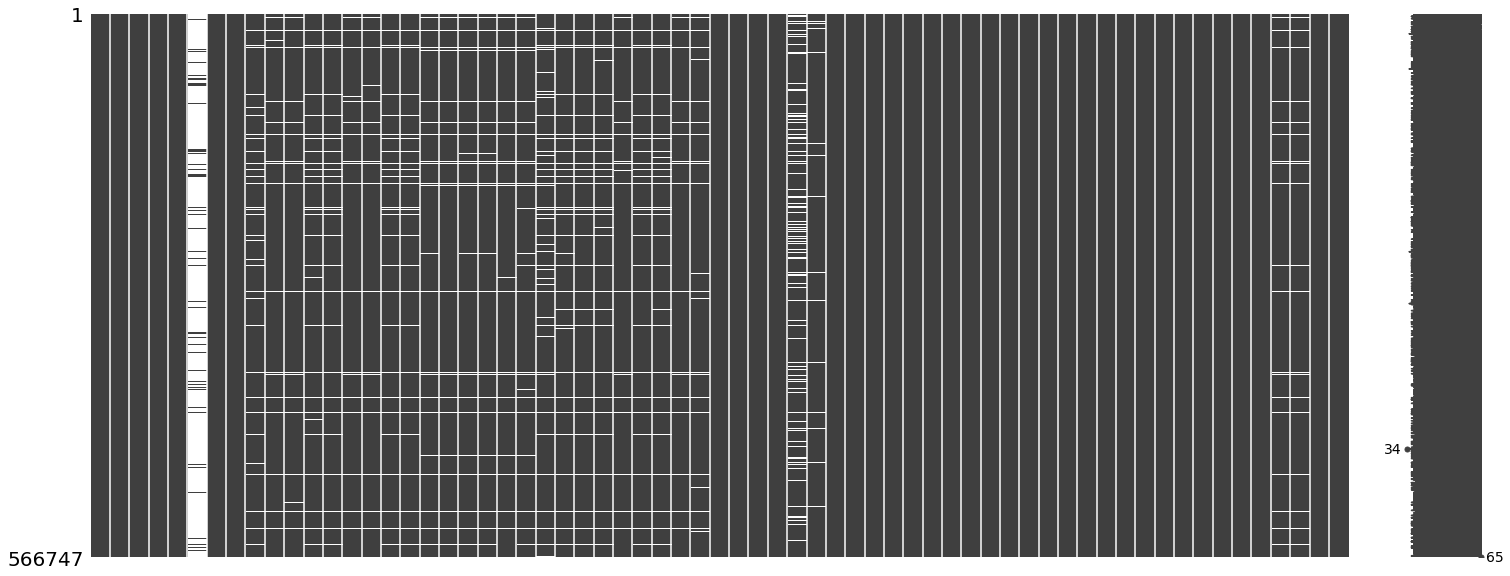

In [18]:
#Plot Nans values:
#!pip install missingno
import missingno as msno
df_2019_new_noid.reset_index(drop=True)
msno.matrix(df_2019_new_noid)

From the plot above, we can see that many of the NaNs are within the same rows, meaning that the missing values might come from the same samples, where they have missing values of at least 24 columns. Therefore, these rows should be discarded from the dataset. 

If we remove all the intermediate scores, leaving only the final score and the percentil, we could examine better which rows se should remove:

In [19]:
df_2019_new_noid.columns

Index(['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_GENERO',
       'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER',
       'COL

In [20]:
#Removing temporary the mid scores (leaving only global scores) to see how they score with respect to the missing values
columns_mid_scores = ['PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA',
       'DESEMP_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS',
       'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES',
       'DESEMP_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
       'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS',
       'PUNT_INGLES', 'PERCENTIL_INGLES', 'DESEMP_INGLES'] 
print(len(columns_mid_scores))

df_2019_new_nscores = df_2019_new_noid.drop(columns = columns_mid_scores)
print(df_2019_new_nscores.shape)
df_2019_new_nscores.head()

15
(566747, 50)


ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO ESTU_PAIS_RESIDE  \
0          COLOMBIA           F           2000-07-12         COLOMBIA   
1          COLOMBIA           F           1998-03-23         COLOMBIA   
2          COLOMBIA           M           2001-03-22         COLOMBIA   
3          COLOMBIA           M           1994-06-16         COLOMBIA   
4          COLOMBIA           F           2000-09-21         COLOMBIA   

  ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE ESTU_MCPIO_RESIDE  \
0              No        NaN             VALLE              CALI   
1              No        NaN             VALLE              CALI   
2              No        NaN             VALLE              CALI   
3              No        NaN             VALLE              CALI   
4              No        NaN            BOGOTA       BOGOTÁ D.C.   

  FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
0            Estrato 4              3 a 4            Cuatro   
1            Estrato 3              7 a 8            Cuatro   
2            Estrato 2              5 a 6            Cuatro   
3            Estrato 2              3 a 4               Dos   
4            Estrato 6              3 a 4              Tres   

                FAMI_EDUCACIONPADRE                 FAMI_EDUCACIONMADRE  \
0  Técnica o tecnológica incompleta  Secundaria (Bachillerato) completa   
1    Técnica o tecnológica completa  Secundaria (Bachillerato) completa   
2               Primaria incompleta      Educación profesional completa   
3    Educación profesional completa      Educación profesional completa   
4    Educación profesional completa      Educación profesional completa   

                              FAMI_TRABAJOLABORPADRE  \
0  Trabaja como profesional (por ejemplo médico, ...   
1  Trabaja por cuenta propia (por ejemplo plomero...   
2  Es dueño de un negocio pequeño (tiene pocos em...   
3  Trabaja como profesional (por ejemplo médico, ...   
4  Trabaja como profesional (por ejemplo médico, ...   

                              FAMI_TRABAJOLABORMADRE FAMI_TIENEINTERNET  \
0          Trabaja en el hogar, no trabaja o estudia                 Si   
1          Trabaja en el hogar, no trabaja o estudia                 Si   
2  Tiene un trabajo de tipo auxiliar administrati...                 Si   
3          Trabaja en el hogar, no trabaja o estudia                 Si   
4          Trabaja en el hogar, no trabaja o estudia                 Si   

  FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR FAMI_TIENELAVADORA  \
0                   Si                   Si                 Si   
1                   Si                   No                 Si   
2                   Si                   No                 Si   
3                   Si                   Si                 No   
4                   Si                   Si                 Si   

  FAMI_TIENEHORNOMICROOGAS FAMI_TIENEAUTOMOVIL FAMI_TIENEMOTOCICLETA  \
0                       Si                  No                    No   
1                       No                  No                    No   
2                       Si                  No                    No   
3                       Si                  No                    Si   
4                       Si                  Si                    No   

  FAMI_TIENECONSOLAVIDEOJUEGOS     FAMI_NUMLIBROS  \
0                           No      0 A 10 LIBROS   
1                           No     11 A 25 LIBROS   
2                           Si      0 A 10 LIBROS   
3                           No      0 A 10 LIBROS   
4                           Si  MÁS DE 100 LIBROS   

       FAMI_COMELECHEDERIVADOS    FAMI_COMECARNEPESCADOHUEVO  \
0  Todos o casi todos los días        3 a 5 veces por semana   
1       3 a 5 veces por semana   Todos o casi todos los días   
2       3 a 5 veces por semana  Nunca o rara vez comemos eso   
3       1 o 2 veces por semana        1 o 2 veces por semana   
4  Todos o casi todos los días   Todos o casi todos los días   

  

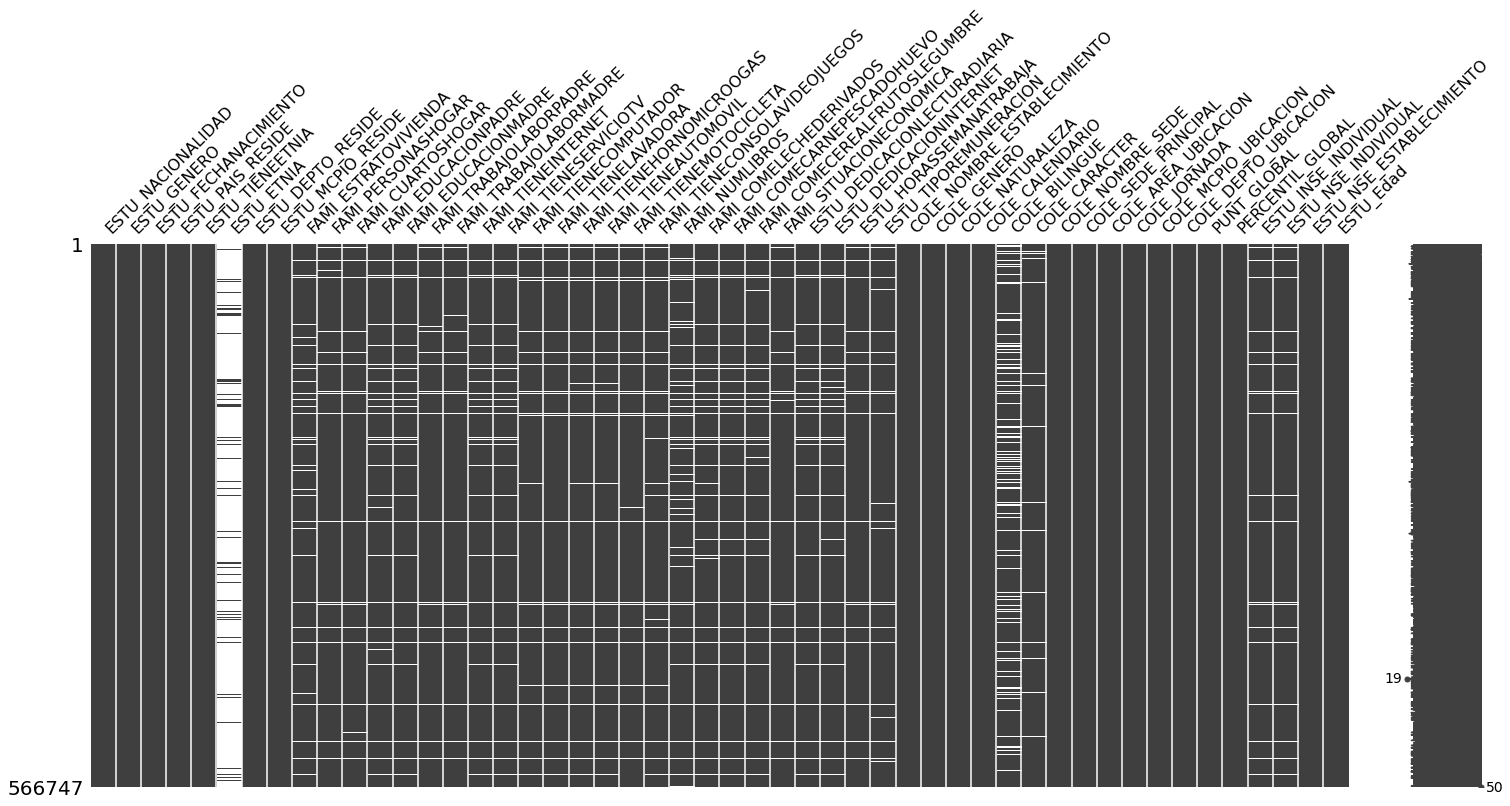

In [21]:
df_2019_new_nscores.reset_index(drop=True)
msno.matrix(df_2019_new_nscores)

We could see that the columns that have more missing values are:

```6   ESTU_ETNIA                     40232 non-null   object ```

```37  COLE_BILINGUE                  475749 non-null  object ```




In [22]:
df_2019_new_nscores.isna().sum()
sumnoid=df_2019_new_noid.isna().sum()
sumnoid.values

array([     0,    106,      0,      0,    394, 526540,    394,    394,
        35888,  16767,  17982,  31835,  31658,  19159,  18322,  32310,
        33299,  17796,  17597,  18421,  18971,  17968,  18973,  46365,
        38188,  33906,  34970,  18725,  33085,  34292,  17709,  18979,
            0,      0,      0,      0,  91473,  16383,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
           19,      0,      0,      0,     19,  17862,  17862,     48,
            0], dtype=int64)

### Analysis of the columns with most NaNs

To analyze the columns ESTU_ETNIA and COLE_BILINGUE, we see the other columns that are related to gather most of the missing information. After this analysis, we compute the still missing NaNs with the mode.

#### ESTU_TIENEETNIA


We first check the NaNs values of ESTU_TIENEETNIA

In [23]:
print(df_2019_new['ESTU_TIENEETNIA'].unique())
temp_null_rc = df_2019_new['ESTU_TIENEETNIA'].isnull().tolist()
# index_null_rc = Emissions_C_df.index[temp_null_rc].tolist()
df_2019_new.loc[temp_null_rc,'ESTU_TIENEETNIA':'ESTU_COD_RESIDE_MCPIO'].values

['No' 'Si' nan]


array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]], dtype=object)

In [24]:
df_2019_new[df_2019_new['ESTU_TIENEETNIA'].isnull()]

ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  ESTU_CONSECUTIVO  \
3072            COLOMBIA           F           1979-05-18  SB11201910072208   
4662            COLOMBIA           M           1997-11-27  SB11201910072216   
4774            COLOMBIA           M           2001-02-22  SB11201910061472   
4775            COLOMBIA           F           2001-08-21  SB11201910061687   
4776            COLOMBIA           M           2001-11-01  SB11201910061334   
...                  ...         ...                  ...               ...   
560373          COLOMBIA           F           2002-07-21  SB11201940632402   
562105          COLOMBIA           F           1999-06-21  SB11201940632378   
562672          COLOMBIA           F           2002-04-26  SB11201940632474   
563255          COLOMBIA           F           2000-04-03  SB11201940632519   
565678          COLOMBIA           F           2003-12-03  SB11201940632536   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
3072           COLOMBIA             NaN        NaN               NaN   
4662           COLOMBIA             NaN        NaN               NaN   
4774           COLOMBIA             NaN        NaN               NaN   
4775           COLOMBIA             NaN        NaN               NaN   
4776           COLOMBIA             NaN        NaN               NaN   
...                 ...             ...        ...               ...   
560373         COLOMBIA             NaN        NaN               NaN   
562105         COLOMBIA             NaN        NaN               NaN   
562672         COLOMBIA             NaN        NaN               NaN   
563255         COLOMBIA             NaN        NaN               NaN   
565678         COLOMBIA             NaN        NaN               NaN   

        ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
3072                      NaN               NaN                    NaN   
4662                      NaN               NaN                    NaN   
4774                      NaN               NaN                    NaN   
4775                      NaN               NaN                    NaN   
4776                      NaN               NaN                    NaN   
...                       ...               ...                    ...   
560373                    NaN               NaN                    NaN   
562105                    NaN               NaN                    NaN   
562672                    NaN               NaN                    NaN   
563255                    NaN               NaN                    NaN   
565678                    NaN               NaN                    NaN   

       FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
3072                    NaN                NaN               NaN   
4662                    NaN                NaN               NaN   
4774                    NaN                NaN               NaN   
4775                    NaN                NaN               NaN   
4776                    NaN                NaN               NaN   
...                     ...                ...               ...   
560373            Estrato 1              3 a 4               Dos   
562105            Estrato 1              3 a 4              Tres   
562672            Estrato 1              3 a 4              Tres   
563255            Estrato 3              7 a 8               Dos   
565678            Estrato 3              3 a 4               Dos   

                   FAMI_EDUCACIONPADRE                   FAMI_EDUCACIONMADRE  \
3072                               NaN                                   NaN   
4662                               NaN                                   NaN   
4774                               NaN                                   NaN   
4775                               NaN                                   NaN   
4776                               NaN                                   NaN   
...    

Given there are just 394 (from 566,747 ~0.06) students that did not answer to the question "Etnia or Type of Etnia", we decided to eliminated them because is an inmaterial subset and there is no other information in the data that can help us to

In [25]:
df_2019_new=df_2019_new[df_2019_new['ESTU_TIENEETNIA'].notnull()]

#### ESTU_ETNIA


Here we analyze now the column ESTU_ETNIA, which is the one that have most NaNs

In [26]:
print(df_2019_new['ESTU_ETNIA'].unique())

[nan 'Ninguno' 'Comunidad afrodescendiente'
 'Otro grupo étnico minoritario' 'Wayúu' 'Emberá' 'Paez' 'Pasto' 'Inga'
 'Comunidades Rom (Gitanas)' 'Raizal' 'Zenú' 'Cubeo' 'Guambiano' 'Sikuani'
 'Pijao' 'Huitoto' 'Arhuaco' 'Cancuamo' 'Palenquero' 'Tucano']


In [27]:
df_2019_new[df_2019_new['ESTU_ETNIA'].isnull()]

ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  ESTU_CONSECUTIVO  \
0               COLOMBIA           F           2000-07-12  SB11201910008548   
1               COLOMBIA           F           1998-03-23  SB11201910004475   
2               COLOMBIA           M           2001-03-22  SB11201910011427   
3               COLOMBIA           M           1994-06-16  SB11201910041975   
4               COLOMBIA           F           2000-09-21  SB11201910014490   
...                  ...         ...                  ...               ...   
567290          COLOMBIA           F           2002-10-05  SB11201940055934   
567291          COLOMBIA           M           2000-06-18  SB11201940532552   
567292          COLOMBIA           M           2002-09-03  SB11201940384638   
567293          COLOMBIA           M           1999-02-25  SB11201940195862   
567294          COLOMBIA           M           2002-10-11  SB11201940210026   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
0              COLOMBIA              No        NaN             VALLE   
1              COLOMBIA              No        NaN             VALLE   
2              COLOMBIA              No        NaN             VALLE   
3              COLOMBIA              No        NaN             VALLE   
4              COLOMBIA              No        NaN            BOGOTA   
...                 ...             ...        ...               ...   
567290         COLOMBIA              No        NaN           VICHADA   
567291         COLOMBIA              No        NaN            TOLIMA   
567292         COLOMBIA              No        NaN   NORTE SANTANDER   
567293         COLOMBIA              No        NaN         ANTIOQUIA   
567294         COLOMBIA              No        NaN         SANTANDER   

        ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
0                        76.0              CALI                76001.0   
1                        76.0              CALI                76001.0   
2                        76.0              CALI                76001.0   
3                        76.0              CALI                76001.0   
4                        11.0       BOGOTÁ D.C.                11001.0   
...                       ...               ...                    ...   
567290                   99.0    PUERTO CARREÑO                99001.0   
567291                   73.0         CHAPARRAL                73168.0   
567292                   54.0           CÁCHIRA                54128.0   
567293                    5.0         MARINILLA                 5440.0   
567294                   68.0        VILLANUEVA                68872.0   

       FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
0                 Estrato 4              3 a 4            Cuatro   
1                 Estrato 3              7 a 8            Cuatro   
2                 Estrato 2              5 a 6            Cuatro   
3                 Estrato 2              3 a 4               Dos   
4                 Estrato 6              3 a 4              Tres   
...                     ...                ...               ...   
567290            Estrato 2              3 a 4               Dos   
567291            Estrato 3              3 a 4               Dos   
567292            Estrato 2              3 a 4              Tres   
567293            Estrato 2              5 a 6               Dos   
567294            Estrato 1              3 a 4               Dos   

                       FAMI_EDUCACIONPADRE  \
0         Técnica o tecnológica incompleta   
1           Técnica o tecnológica completa   
2                      Primaria incompleta   
3           Educación profesional completa   
4           Educación profesional completa   
...                                    ...   
567290      Técnica o tecnológica completa   
567291  Secundaria (Bachillerato) completa   
567292                 Primaria incompleta   
567293                 Prim

In [28]:
df_2019_new['ESTU_ETNIA'] = np.where((df_2019_new['ESTU_ETNIA'].isnull()) & (df_2019_new['ESTU_TIENEETNIA']== 'No'), 'Ninguno', df_2019_new['ESTU_ETNIA'])

In [29]:
print(df_2019_new['ESTU_ETNIA'].unique())

['Ninguno' 'Comunidad afrodescendiente' 'Otro grupo étnico minoritario'
 'Wayúu' nan 'Emberá' 'Paez' 'Pasto' 'Inga' 'Comunidades Rom (Gitanas)'
 'Raizal' 'Zenú' 'Cubeo' 'Guambiano' 'Sikuani' 'Pijao' 'Huitoto' 'Arhuaco'
 'Cancuamo' 'Palenquero' 'Tucano']


In [30]:
df_2019_new[df_2019_new['ESTU_ETNIA'].isnull()]

ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  ESTU_CONSECUTIVO  \
3564            COLOMBIA           M           2002-05-23  SB11201910014299   
3920            COLOMBIA           F           2002-04-06  SB11201910017074   
10423           COLOMBIA           F           2002-05-05  SB11201910024699   
10441           COLOMBIA           F           2002-07-02  SB11201910023158   
10448           COLOMBIA           M           2002-01-30  SB11201910014009   
...                  ...         ...                  ...               ...   
565069          COLOMBIA           F           2002-01-20  SB11201940016311   
565170          COLOMBIA           F           2003-10-23  SB11201940341741   
565766          COLOMBIA           F           1998-06-04  SB11201940184072   
566654          COLOMBIA           F           2002-01-15  SB11201940125737   
567229          COLOMBIA           F           2002-02-06  SB11201940282756   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
3564           COLOMBIA              Si        NaN             VALLE   
3920           COLOMBIA              Si        NaN             VALLE   
10423          COLOMBIA              Si        NaN             VALLE   
10441          COLOMBIA              Si        NaN             VALLE   
10448          COLOMBIA              Si        NaN             VALLE   
...                 ...             ...        ...               ...   
565069         COLOMBIA              Si        NaN             CAUCA   
565170         COLOMBIA              Si        NaN            ARAUCA   
565766         COLOMBIA              Si        NaN        LA GUAJIRA   
566654         COLOMBIA              Si        NaN            VAUPES   
567229         COLOMBIA              Si        NaN            CALDAS   

        ESTU_COD_RESIDE_DEPTO       ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
3564                     76.0                    CALI                76001.0   
3920                     76.0     GUADALAJARA DE BUGA                76111.0   
10423                    76.0                   YUMBO                76892.0   
10441                    76.0                   YUMBO                76892.0   
10448                    76.0                   YUMBO                76892.0   
...                       ...                     ...                    ...   
565069                   19.0  SANTANDER DE QUILICHAO                19698.0   
565170                   81.0                  ARAUCA                81001.0   
565766                   44.0                  URIBIA                44847.0   
566654                   97.0                    MITÚ                97001.0   
567229                   17.0                   SUPÍA                17777.0   

       FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
3564              Estrato 2              1 a 2               Dos   
3920              Estrato 3              3 a 4              Tres   
10423             Estrato 3              1 a 2               Dos   
10441             Estrato 3              3 a 4            Cuatro   
10448             Estrato 2              3 a 4               Dos   
...                     ...                ...               ...   
565069            Estrato 1              7 a 8        Seis o mas   
565170            Estrato 3              7 a 8               Dos   
565766            Estrato 3              5 a 6               Dos   
566654            Estrato 4              7 a 8            Cuatro   
567229            Estrato 1              5 a 6            Cuatro   

                         FAMI_EDUCACIONPADRE  \
3564          Técnica o tecnológica completa   
3920          Técnica o tecnológica completa   
10423     Secundaria (Bachillerato) completa   
10441     Secundaria (Bachillerato) completa   
10448     Secundaria (Bachillerato) completa   
...                                      ...   
565069  Secundaria (Bachillerato) incompleta   
565170    Secundaria (Bachiller

There are 1,444 students which belong to an Etnia, however this one is not on the list. Given the default situation when this happens is to set 'Otro grupo étnico minoritario'; we decided to change the NaNs to this group.

In [31]:
df_2019_new['ESTU_ETNIA'] = np.where((df_2019_new['ESTU_ETNIA'].isnull()) , 'Otro grupo étnico minoritario', df_2019_new['ESTU_ETNIA'])

In [32]:
df_2019_new['ESTU_ETNIA'].isnull().sum()

0

#### COLE_BILINGUE


The column COLE_BILINGUE has a lot of NaNs, here is the analysis:

In [33]:
print(df_2019_new['COLE_BILINGUE'].unique())

['N' 'S' nan]


In [34]:
df_2019_new[df_2019_new['COLE_BILINGUE'].isnull()]

ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  ESTU_CONSECUTIVO  \
135             COLOMBIA           M           2002-02-15  SB11201910007626   
136             COLOMBIA           F           2002-01-07  SB11201910007579   
137             COLOMBIA           M           2001-11-05  SB11201910007629   
138            VENEZUELA           M           2001-08-02  SB11201910007605   
139             COLOMBIA           M           1999-11-24  SB11201910007654   
...                  ...         ...                  ...               ...   
567263          COLOMBIA           F           2002-06-11  SB11201940385246   
567267          COLOMBIA           F           2002-11-09  SB11201940605266   
567273          COLOMBIA           F           2002-10-21  SB11201940511689   
567275          COLOMBIA           F           2000-02-06  SB11201940391395   
567279          COLOMBIA           M           2002-03-10  SB11201940223489   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
135            COLOMBIA              No    Ninguno            BOGOTA   
136            COLOMBIA              No    Ninguno            BOGOTA   
137            COLOMBIA              No    Ninguno            BOGOTA   
138           VENEZUELA              No    Ninguno            BOGOTA   
139            COLOMBIA              No    Ninguno            BOGOTA   
...                 ...             ...        ...               ...   
567263         COLOMBIA              No    Ninguno   NORTE SANTANDER   
567267         COLOMBIA              No    Ninguno             VALLE   
567273         COLOMBIA              No    Ninguno            BOGOTÁ   
567275         COLOMBIA              No    Ninguno         ANTIOQUIA   
567279         COLOMBIA              No    Ninguno         ANTIOQUIA   

        ESTU_COD_RESIDE_DEPTO  ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
135                      11.0        BOGOTÁ D.C.                11001.0   
136                      11.0        BOGOTÁ D.C.                11001.0   
137                      11.0        BOGOTÁ D.C.                11001.0   
138                      11.0        BOGOTÁ D.C.                11001.0   
139                      11.0        BOGOTÁ D.C.                11001.0   
...                       ...                ...                    ...   
567263                   54.0  VILLA DEL ROSARIO                54874.0   
567267                   76.0               CALI                76001.0   
567273                   11.0        BOGOTÁ D.C.                11001.0   
567275                    5.0              BELLO                 5088.0   
567279                    5.0           SABANETA                 5631.0   

       FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
135               Estrato 4              3 a 4            Cuatro   
136               Estrato 5              5 a 6              Tres   
137               Estrato 5              3 a 4              Tres   
138               Estrato 6              7 a 8             Cinco   
139               Estrato 4              3 a 4              Tres   
...                     ...                ...               ...   
567263            Estrato 2              3 a 4              Tres   
567267            Estrato 1              5 a 6            Cuatro   
567273            Estrato 3              3 a 4              Tres   
567275            Estrato 3              3 a 4              Tres   
567279            Estrato 2              7 a 8              Tres   

                       FAMI_EDUCACIONPADRE  \
135                              Postgrado   
136                              Postgrado   
137         Educación profesional completa   
138                              Postgrado   
139     Secundaria (Bachillerato) completa   
...                                    ...   
567263                 Primaria incompleta   
567267  Secundaria (Bachillerato) completa   
567273    Técnica o tecnológica incompleta   
567275      Edu

In [35]:
print(df_2019_new['COLE_NATURALEZA'].unique())

['OFICIAL' 'NO OFICIAL']


In [36]:
# Given there is no a Bilingual Oficial School in Colombia
df_2019_new['COLE_BILINGUE'] = np.where((df_2019_new['COLE_BILINGUE'].isnull()) & (df_2019_new['COLE_NATURALEZA']== 'OFICIAL'), 'N', df_2019_new['COLE_BILINGUE'])

In [37]:
df_2019_new[df_2019_new['COLE_BILINGUE'].isnull()]

ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  ESTU_CONSECUTIVO  \
135             COLOMBIA           M           2002-02-15  SB11201910007626   
136             COLOMBIA           F           2002-01-07  SB11201910007579   
137             COLOMBIA           M           2001-11-05  SB11201910007629   
138            VENEZUELA           M           2001-08-02  SB11201910007605   
139             COLOMBIA           M           1999-11-24  SB11201910007654   
...                  ...         ...                  ...               ...   
567175          COLOMBIA           F           2002-09-15  SB11201940530793   
567240          COLOMBIA           F           2002-09-03  SB11201940537613   
567267          COLOMBIA           F           2002-11-09  SB11201940605266   
567273          COLOMBIA           F           2002-10-21  SB11201940511689   
567275          COLOMBIA           F           2000-02-06  SB11201940391395   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
135            COLOMBIA              No    Ninguno            BOGOTA   
136            COLOMBIA              No    Ninguno            BOGOTA   
137            COLOMBIA              No    Ninguno            BOGOTA   
138           VENEZUELA              No    Ninguno            BOGOTA   
139            COLOMBIA              No    Ninguno            BOGOTA   
...                 ...             ...        ...               ...   
567175         COLOMBIA              No    Ninguno             HUILA   
567240         COLOMBIA              No    Ninguno         SANTANDER   
567267         COLOMBIA              No    Ninguno             VALLE   
567273         COLOMBIA              No    Ninguno            BOGOTÁ   
567275         COLOMBIA              No    Ninguno         ANTIOQUIA   

        ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
135                      11.0       BOGOTÁ D.C.                11001.0   
136                      11.0       BOGOTÁ D.C.                11001.0   
137                      11.0       BOGOTÁ D.C.                11001.0   
138                      11.0       BOGOTÁ D.C.                11001.0   
139                      11.0       BOGOTÁ D.C.                11001.0   
...                       ...               ...                    ...   
567175                   41.0         GUADALUPE                41319.0   
567240                   68.0             GIRÓN                68307.0   
567267                   76.0              CALI                76001.0   
567273                   11.0       BOGOTÁ D.C.                11001.0   
567275                    5.0             BELLO                 5088.0   

       FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
135               Estrato 4              3 a 4            Cuatro   
136               Estrato 5              5 a 6              Tres   
137               Estrato 5              3 a 4              Tres   
138               Estrato 6              7 a 8             Cinco   
139               Estrato 4              3 a 4              Tres   
...                     ...                ...               ...   
567175            Estrato 2              3 a 4              Tres   
567240            Estrato 2              3 a 4               Dos   
567267            Estrato 1              5 a 6            Cuatro   
567273            Estrato 3              3 a 4              Tres   
567275            Estrato 3              3 a 4              Tres   

                         FAMI_EDUCACIONPADRE  \
135                                Postgrado   
136                                Postgrado   
137           Educación profesional completa   
138                                Postgrado   
139       Secundaria (Bachillerato) completa   
...                                      ...   
567175  Secundaria (Bachillerato) incompleta   
567240  Secundaria (Bachillerato) incompleta   
567267    Secundaria (Bachillerato) completa   
567273 

In [38]:
print((df_2019_new[df_2019_new['COLE_BILINGUE'].isnull()]['COLE_JORNADA']).unique())

['COMPLETA' 'SABATINA' 'MAÑANA' 'NOCHE' 'TARDE' 'UNICA']


In [39]:
# Given there is no a Bilingual Sabatina, Nigth or noon School in Colombia
df_2019_new['COLE_BILINGUE'] = np.where((df_2019_new['COLE_BILINGUE'].isnull()) & (df_2019_new['COLE_JORNADA']== 'SABATINA'), 'N', df_2019_new['COLE_BILINGUE'])
df_2019_new['COLE_BILINGUE'] = np.where((df_2019_new['COLE_BILINGUE'].isnull()) & (df_2019_new['COLE_JORNADA']== 'NOCHE'), 'N', df_2019_new['COLE_BILINGUE'])
df_2019_new['COLE_BILINGUE'] = np.where((df_2019_new['COLE_BILINGUE'].isnull()) & (df_2019_new['COLE_JORNADA']== 'TARDE'), 'N', df_2019_new['COLE_BILINGUE'])

In [40]:
df_2019_new[df_2019_new['COLE_BILINGUE'].isnull()]

ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  ESTU_CONSECUTIVO  \
135             COLOMBIA           M           2002-02-15  SB11201910007626   
136             COLOMBIA           F           2002-01-07  SB11201910007579   
137             COLOMBIA           M           2001-11-05  SB11201910007629   
138            VENEZUELA           M           2001-08-02  SB11201910007605   
139             COLOMBIA           M           1999-11-24  SB11201910007654   
...                  ...         ...                  ...               ...   
567139          COLOMBIA           F           2002-01-17  SB11201940365440   
567157          COLOMBIA           F           2001-03-26  SB11201940571299   
567240          COLOMBIA           F           2002-09-03  SB11201940537613   
567267          COLOMBIA           F           2002-11-09  SB11201940605266   
567273          COLOMBIA           F           2002-10-21  SB11201940511689   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
135            COLOMBIA              No    Ninguno            BOGOTA   
136            COLOMBIA              No    Ninguno            BOGOTA   
137            COLOMBIA              No    Ninguno            BOGOTA   
138           VENEZUELA              No    Ninguno            BOGOTA   
139            COLOMBIA              No    Ninguno            BOGOTA   
...                 ...             ...        ...               ...   
567139         COLOMBIA              No    Ninguno         SANTANDER   
567157         COLOMBIA              No    Ninguno            NARIÑO   
567240         COLOMBIA              No    Ninguno         SANTANDER   
567267         COLOMBIA              No    Ninguno             VALLE   
567273         COLOMBIA              No    Ninguno            BOGOTÁ   

        ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
135                      11.0       BOGOTÁ D.C.                11001.0   
136                      11.0       BOGOTÁ D.C.                11001.0   
137                      11.0       BOGOTÁ D.C.                11001.0   
138                      11.0       BOGOTÁ D.C.                11001.0   
139                      11.0       BOGOTÁ D.C.                11001.0   
...                       ...               ...                    ...   
567139                   68.0       PIEDECUESTA                68547.0   
567157                   52.0             PASTO                52001.0   
567240                   68.0             GIRÓN                68307.0   
567267                   76.0              CALI                76001.0   
567273                   11.0       BOGOTÁ D.C.                11001.0   

       FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
135               Estrato 4              3 a 4            Cuatro   
136               Estrato 5              5 a 6              Tres   
137               Estrato 5              3 a 4              Tres   
138               Estrato 6              7 a 8             Cinco   
139               Estrato 4              3 a 4              Tres   
...                     ...                ...               ...   
567139            Estrato 3              5 a 6              Tres   
567157            Estrato 1              3 a 4              Tres   
567240            Estrato 2              3 a 4               Dos   
567267            Estrato 1              5 a 6            Cuatro   
567273            Estrato 3              3 a 4              Tres   

                         FAMI_EDUCACIONPADRE  \
135                                Postgrado   
136                                Postgrado   
137           Educación profesional completa   
138                                Postgrado   
139       Secundaria (Bachillerato) completa   
...                                      ...   
567139                   Primaria incompleta   
567157                   Primaria incompleta   
567240  Secundaria (Bachillerato) incompleta   
567267 

In [41]:
# Imputed based on a kind of Mode
df_2019_new["COLE_BILINGUE"].fillna( method ='ffill', inplace = True) 

In [42]:
df_2019_new["COLE_BILINGUE"].isna().sum()

0

#### COLE_CARACTER


The column COLE_CARACTER has some NaNs values, and is the missing column of the school that might need to clean. The other columns of the school have no NaN values. The nature of the school COLE_NATURALEZA can be gathered from the information of the same column

In [43]:
print(df_2019_new['COLE_CARACTER'].unique())

['TÉCNICO/ACADÉMICO' 'ACADÉMICO' 'TÉCNICO' nan 'NO APLICA']


In [44]:
df_2019_new[df_2019_new['COLE_CARACTER'].isnull()]

ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  ESTU_CONSECUTIVO  \
2840            COLOMBIA           F           1982-01-27  SB11201910051842   
2841            COLOMBIA           M           1998-05-19  SB11201910047440   
2842            COLOMBIA           F           1992-02-14  SB11201910048154   
2843            COLOMBIA           M           2002-06-03  SB11201910055957   
2844            COLOMBIA           M           1992-12-27  SB11201910051781   
...                  ...         ...                  ...               ...   
567088          COLOMBIA           F           1987-05-14  SB11201940491762   
567103          COLOMBIA           F           1984-10-05  SB11201940621579   
567140          COLOMBIA           F           1999-05-27  SB11201940574209   
567157          COLOMBIA           F           2001-03-26  SB11201940571299   
567175          COLOMBIA           F           2002-09-15  SB11201940530793   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
2840           COLOMBIA              No    Ninguno              META   
2841           COLOMBIA              No    Ninguno              META   
2842           COLOMBIA              No    Ninguno              META   
2843           COLOMBIA              No    Ninguno              META   
2844           COLOMBIA              No    Ninguno              META   
...                 ...             ...        ...               ...   
567088         COLOMBIA              No    Ninguno            BOGOTÁ   
567103         COLOMBIA              No    Ninguno            BOGOTÁ   
567140         COLOMBIA              No    Ninguno         SANTANDER   
567157         COLOMBIA              No    Ninguno            NARIÑO   
567175         COLOMBIA              No    Ninguno             HUILA   

        ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
2840                     50.0     VILLAVICENCIO                50001.0   
2841                     50.0     VILLAVICENCIO                50001.0   
2842                     50.0           ACACÍAS                50006.0   
2843                     50.0     VILLAVICENCIO                50001.0   
2844                     50.0     VILLAVICENCIO                50001.0   
...                       ...               ...                    ...   
567088                   11.0       BOGOTÁ D.C.                11001.0   
567103                   11.0       BOGOTÁ D.C.                11001.0   
567140                   68.0           BARBOSA                68077.0   
567157                   52.0             PASTO                52001.0   
567175                   41.0         GUADALUPE                41319.0   

       FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
2840              Estrato 1              5 a 6              Tres   
2841              Estrato 2              3 a 4              Tres   
2842              Estrato 2              5 a 6            Cuatro   
2843              Estrato 3              1 a 2               Dos   
2844              Estrato 3              3 a 4              Tres   
...                     ...                ...               ...   
567088            Estrato 3              3 a 4              Tres   
567103          Sin Estrato              7 a 8              Tres   
567140            Estrato 1              7 a 8            Cuatro   
567157            Estrato 1              3 a 4              Tres   
567175            Estrato 2              3 a 4              Tres   

                         FAMI_EDUCACIONPADRE  \
2840                                 Ninguno   
2841                       Primaria completa   
2842      Secundaria (Bachillerato) completa   
2843      Secundaria (Bachillerato) completa   
2844                     Primaria incompleta   
...                                      ...   
567088                   Primaria incompleta   
567103                               No sabe   
567140                   Primaria incompleta   
567157 

In [45]:
# Imputed based on a kind of Mode
df_2019_new["COLE_CARACTER"].fillna( method ='ffill', inplace = True) 

In [46]:
df_2019_new.groupby(["COLE_CARACTER"]).count()

ESTU_NACIONALIDAD  ESTU_GENERO  ESTU_FECHANACIMIENTO  \
COLE_CARACTER                                                             
ACADÉMICO                     308740       308659                308740   
NO APLICA                       7471         7470                  7471   
TÉCNICO                        62414        62407                 62414   
TÉCNICO/ACADÉMICO             187728       187714                187728   

                   ESTU_CONSECUTIVO  ESTU_PAIS_RESIDE  ESTU_TIENEETNIA  \
COLE_CARACTER                                                            
ACADÉMICO                    308740            308740           308740   
NO APLICA                      7471              7471             7471   
TÉCNICO                       62414             62414            62414   
TÉCNICO/ACADÉMICO            187728            187728           187728   

                   ESTU_ETNIA  ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO  \
COLE_CARACTER                                                             
ACADÉMICO              308740             308740                 308740   
NO APLICA                7471               7471                   7471   
TÉCNICO                 62414              62414                  62414   
TÉCNICO/ACADÉMICO      187728             187728                 187728   

                   ESTU_MCPIO_RESIDE  ESTU_COD_RESIDE_MCPIO  \
COLE_CARACTER                                                 
ACADÉMICO                     308740                 308740   
NO APLICA                       7471                   7471   
TÉCNICO                        62414                  62414   
TÉCNICO/ACADÉMICO             187728                 187728   

                   FAMI_ESTRATOVIVIENDA  FAMI_PERSONASHOGAR  \
COLE_CARACTER                                                 
ACADÉMICO                        289455              299818   
NO APLICA                          6946                7247   
TÉCNICO                           58439               60629   
TÉCNICO/ACADÉMICO                175668              181921   

                   FAMI_CUARTOSHOGAR  FAMI_EDUCACIONPADRE  \
COLE_CARACTER                                               
ACADÉMICO                     299165               291562   
NO APLICA                       7234                 7017   
TÉCNICO                        60530                58965   
TÉCNICO/ACADÉMICO             181473               177013   

                   FAMI_EDUCACIONMADRE  FAMI_TRABAJOLABORPADRE  \
COLE_CARACTER                                                    
ACADÉMICO                       291602                  298617   
NO APLICA                         7019                    7241   
TÉCNICO                          58979                   60376   
TÉCNICO/ACADÉMICO               177135                  180990   

                   FAMI_TRABAJOLABORMADRE  FAMI_TIENEINTERNET  \
COLE_CARACTER                                                   
ACADÉMICO                          299012              291280   
NO APLICA                            7245                6998   
TÉCNICO                             60464               58938   
TÉCNICO/ACADÉMICO                  181340              176869   

                   FAMI_TIENESERVICIOTV  FAMI_TIENECOMPUTADOR  \
COLE_CARACTER                                                   
ACADÉMICO                        290740                299266   
NO APLICA                          6991                  7240   
TÉCNICO                           58827                 60545   
TÉCNICO/ACADÉMICO                176540                181535   

                   FAMI_TIENELAVADORA  FAMI_TIENEHORNOMICROOGAS  \
COLE_CARACTER                                                     
ACADÉMICO                      299350                    298889   
NO APLICA                        7238                      7211   
TÉCNICO                         60569                     60487   
TÉCNICO/ACADÉMICO              18

Saving the first version of a cleaned dataset in a csv file.

In [47]:
# #Save the new DF2019_newb in a new csv file
# df_2019_new.to_csv("Data/SB11_2019_clean1.csv", sep = ',',index = False,encoding='ISO-8859-1')#'UTF-8')

In [48]:
# #Removing no necesary ids and middle scores:
# df_2019noid2 = df_2019_new.drop(columns = columns_important_ids)
# df_2019nn2 = df_2019noid2.drop(columns = columns_mid_scores)

# #Save the new DF2019_newb in a new csv file
# df_2019nn2.to_csv("Data/SB11_2019_clean1_nn.csv", sep = ',',index = False,encoding='ISO-8859-1')#'UTF-8')

In [109]:
#Loading the files

df_2019_new = pd.read_csv('Data/SB11_2019_clean1.csv',skiprows= 0,encoding='ISO-8859-1')#'ISO-8859-1')#, nrows=100000)

### Analysis of the NaNs values of the whole dataset:

In [49]:
df_2019_new=df_2019_new.reset_index()

In [50]:
df_2019_new.tail()

index ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
566348  567290          COLOMBIA           F           2002-10-05   
566349  567291          COLOMBIA           M           2000-06-18   
566350  567292          COLOMBIA           M           2002-09-03   
566351  567293          COLOMBIA           M           1999-02-25   
566352  567294          COLOMBIA           M           2002-10-11   

        ESTU_CONSECUTIVO ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA  \
566348  SB11201940055934         COLOMBIA              No    Ninguno   
566349  SB11201940532552         COLOMBIA              No    Ninguno   
566350  SB11201940384638         COLOMBIA              No    Ninguno   
566351  SB11201940195862         COLOMBIA              No    Ninguno   
566352  SB11201940210026         COLOMBIA              No    Ninguno   

       ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO ESTU_MCPIO_RESIDE  \
566348           VICHADA                   99.0    PUERTO CARREÑO   
566349            TOLIMA                   73.0         CHAPARRAL   
566350   NORTE SANTANDER                   54.0           CÁCHIRA   
566351         ANTIOQUIA                    5.0         MARINILLA   
566352         SANTANDER                   68.0        VILLANUEVA   

        ESTU_COD_RESIDE_MCPIO FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR  \
566348                99001.0            Estrato 2              3 a 4   
566349                73168.0            Estrato 3              3 a 4   
566350                54128.0            Estrato 2              3 a 4   
566351                 5440.0            Estrato 2              5 a 6   
566352                68872.0            Estrato 1              3 a 4   

       FAMI_CUARTOSHOGAR                 FAMI_EDUCACIONPADRE  \
566348               Dos      Técnica o tecnológica completa   
566349               Dos  Secundaria (Bachillerato) completa   
566350              Tres                 Primaria incompleta   
566351               Dos                 Primaria incompleta   
566352               Dos                 Primaria incompleta   

                         FAMI_EDUCACIONMADRE  \
566348        Técnica o tecnológica completa   
566349        Educación profesional completa   
566350  Secundaria (Bachillerato) incompleta   
566351    Secundaria (Bachillerato) completa   
566352  Secundaria (Bachillerato) incompleta   

                                   FAMI_TRABAJOLABORPADRE  \
566348                                            No sabe   
566349  Es operario de máquinas o conduce vehículos (t...   
566350                Es agricultor, pesquero o jornalero   
566351  Trabaja por cuenta propia (por ejemplo plomero...   
566352  Trabaja como personal de limpieza, mantenimien...   

                                   FAMI_TRABAJOLABORMADRE FAMI_TIENEINTERNET  \
566348  Tiene un trabajo de tipo auxiliar administrati...                 Si   
566349  Trabaja como profesional (por ejemplo médico, ...                 Si   
566350  Trabaja como personal de limpieza, mantenimien...                 No   
566351  Trabaja por cuenta propia (por ejemplo plomero...                 Si   
566352  Trabaja como personal de limpieza, mantenimien...                 No   

       FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR FAMI_TIENELAVADORA  \
566348                   Si                   Si                 Si   
566349                   Si                   Si                 Si   
566350                   No                   No                 Si   
566351                   Si                   Si                 No   
566352                   Si                   No                 No   

       FAMI_TIENEHORNOMICROOGAS FAMI_TIENEAUTOMOVIL FAMI_TIENEMOTOCICLETA  \
566348                       Si                  Si                    Si   
566349                       No                  No                    Si   
566350                       No                  No                    Si   
566351                       No                  N

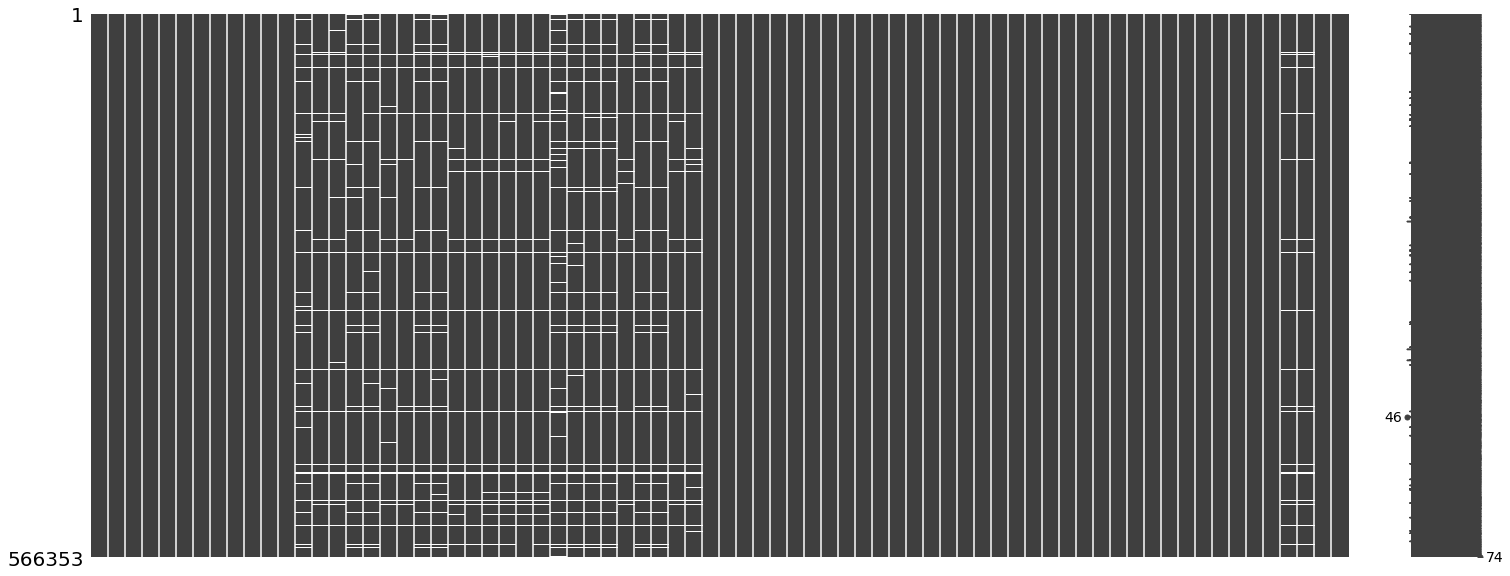

In [51]:
df_2019_new.reset_index(drop=True)
msno.matrix(df_2019_new)

In [52]:
#Removing no necesary ids and middle scores:
df_2019noid2 = df_2019_new.drop(columns = columns_important_ids)
df_2019nn2 = df_2019noid2.drop(columns = columns_mid_scores)
print(df_2019nn2.shape)
df_2019nn2.head()

(566353, 51)


index ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO ESTU_PAIS_RESIDE  \
0      0          COLOMBIA           F           2000-07-12         COLOMBIA   
1      1          COLOMBIA           F           1998-03-23         COLOMBIA   
2      2          COLOMBIA           M           2001-03-22         COLOMBIA   
3      3          COLOMBIA           M           1994-06-16         COLOMBIA   
4      4          COLOMBIA           F           2000-09-21         COLOMBIA   

  ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE ESTU_MCPIO_RESIDE  \
0              No    Ninguno             VALLE              CALI   
1              No    Ninguno             VALLE              CALI   
2              No    Ninguno             VALLE              CALI   
3              No    Ninguno             VALLE              CALI   
4              No    Ninguno            BOGOTA       BOGOTÁ D.C.   

  FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR FAMI_CUARTOSHOGAR  \
0            Estrato 4              3 a 4            Cuatro   
1            Estrato 3              7 a 8            Cuatro   
2            Estrato 2              5 a 6            Cuatro   
3            Estrato 2              3 a 4               Dos   
4            Estrato 6              3 a 4              Tres   

                FAMI_EDUCACIONPADRE                 FAMI_EDUCACIONMADRE  \
0  Técnica o tecnológica incompleta  Secundaria (Bachillerato) completa   
1    Técnica o tecnológica completa  Secundaria (Bachillerato) completa   
2               Primaria incompleta      Educación profesional completa   
3    Educación profesional completa      Educación profesional completa   
4    Educación profesional completa      Educación profesional completa   

                              FAMI_TRABAJOLABORPADRE  \
0  Trabaja como profesional (por ejemplo médico, ...   
1  Trabaja por cuenta propia (por ejemplo plomero...   
2  Es dueño de un negocio pequeño (tiene pocos em...   
3  Trabaja como profesional (por ejemplo médico, ...   
4  Trabaja como profesional (por ejemplo médico, ...   

                              FAMI_TRABAJOLABORMADRE FAMI_TIENEINTERNET  \
0          Trabaja en el hogar, no trabaja o estudia                 Si   
1          Trabaja en el hogar, no trabaja o estudia                 Si   
2  Tiene un trabajo de tipo auxiliar administrati...                 Si   
3          Trabaja en el hogar, no trabaja o estudia                 Si   
4          Trabaja en el hogar, no trabaja o estudia                 Si   

  FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR FAMI_TIENELAVADORA  \
0                   Si                   Si                 Si   
1                   Si                   No                 Si   
2                   Si                   No                 Si   
3                   Si                   Si                 No   
4                   Si                   Si                 Si   

  FAMI_TIENEHORNOMICROOGAS FAMI_TIENEAUTOMOVIL FAMI_TIENEMOTOCICLETA  \
0                       Si                  No                    No   
1                       No                  No                    No   
2                       Si                  No                    No   
3                       Si                  No                    Si   
4                       Si                  Si                    No   

  FAMI_TIENECONSOLAVIDEOJUEGOS     FAMI_NUMLIBROS  \
0                           No      0 A 10 LIBROS   
1                           No     11 A 25 LIBROS   
2                           Si      0 A 10 LIBROS   
3                           No      0 A 10 LIBROS   
4                           Si  MÁS DE 100 LIBROS   

       FAMI_COMELECHEDERIVADOS    FAMI_COMECARNEPESCADOHUEVO  \
0  Todos o casi todos los días        3 a 5 veces por semana   
1       3 a 5 veces por semana   Todos o casi todos los días   
2       3 a 5 veces por semana  Nunca o rara vez comemos eso   
3       1 o 2 veces por semana        1 o 2 veces por semana   
4  Todos o casi todos los 

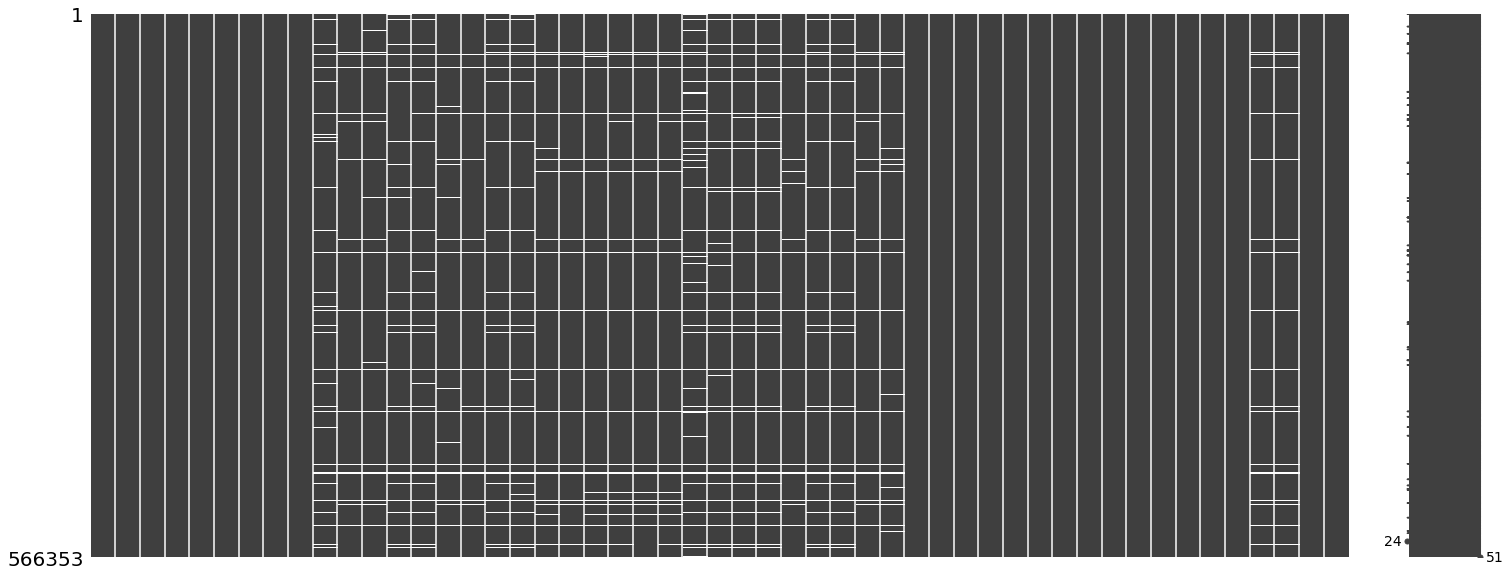

In [53]:
df_2019nn2.reset_index(drop=True)
msno.matrix(df_2019nn2)

In [54]:
#Sum of columns with NaNs
df_2019nn2.isna().sum()
sum_df_2019nn2=df_2019nn2.isna().sum()
sum_df_2019nn2.values

array([    0,     0,   103,     0,     0,     0,     0,     0,     0,
       35845, 16738, 17951, 31796, 31618, 19129, 18292, 32268, 33255,
       17767, 17569, 18390, 18941, 17940, 18942, 46306, 38143, 33864,
       34928, 18691, 33043, 34250, 17676, 18946,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,    19, 17851, 17851,    48,     0], dtype=int64)

In [55]:
df_2019nn2.tail()

index ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
566348  567290          COLOMBIA           F           2002-10-05   
566349  567291          COLOMBIA           M           2000-06-18   
566350  567292          COLOMBIA           M           2002-09-03   
566351  567293          COLOMBIA           M           1999-02-25   
566352  567294          COLOMBIA           M           2002-10-11   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
566348         COLOMBIA              No    Ninguno           VICHADA   
566349         COLOMBIA              No    Ninguno            TOLIMA   
566350         COLOMBIA              No    Ninguno   NORTE SANTANDER   
566351         COLOMBIA              No    Ninguno         ANTIOQUIA   
566352         COLOMBIA              No    Ninguno         SANTANDER   

       ESTU_MCPIO_RESIDE FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR  \
566348    PUERTO CARREÑO            Estrato 2              3 a 4   
566349         CHAPARRAL            Estrato 3              3 a 4   
566350           CÁCHIRA            Estrato 2              3 a 4   
566351         MARINILLA            Estrato 2              5 a 6   
566352        VILLANUEVA            Estrato 1              3 a 4   

       FAMI_CUARTOSHOGAR                 FAMI_EDUCACIONPADRE  \
566348               Dos      Técnica o tecnológica completa   
566349               Dos  Secundaria (Bachillerato) completa   
566350              Tres                 Primaria incompleta   
566351               Dos                 Primaria incompleta   
566352               Dos                 Primaria incompleta   

                         FAMI_EDUCACIONMADRE  \
566348        Técnica o tecnológica completa   
566349        Educación profesional completa   
566350  Secundaria (Bachillerato) incompleta   
566351    Secundaria (Bachillerato) completa   
566352  Secundaria (Bachillerato) incompleta   

                                   FAMI_TRABAJOLABORPADRE  \
566348                                            No sabe   
566349  Es operario de máquinas o conduce vehículos (t...   
566350                Es agricultor, pesquero o jornalero   
566351  Trabaja por cuenta propia (por ejemplo plomero...   
566352  Trabaja como personal de limpieza, mantenimien...   

                                   FAMI_TRABAJOLABORMADRE FAMI_TIENEINTERNET  \
566348  Tiene un trabajo de tipo auxiliar administrati...                 Si   
566349  Trabaja como profesional (por ejemplo médico, ...                 Si   
566350  Trabaja como personal de limpieza, mantenimien...                 No   
566351  Trabaja por cuenta propia (por ejemplo plomero...                 Si   
566352  Trabaja como personal de limpieza, mantenimien...                 No   

       FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR FAMI_TIENELAVADORA  \
566348                   Si                   Si                 Si   
566349                   Si                   Si                 Si   
566350                   No                   No                 Si   
566351                   Si                   Si                 No   
566352                   Si                   No                 No   

       FAMI_TIENEHORNOMICROOGAS FAMI_TIENEAUTOMOVIL FAMI_TIENEMOTOCICLETA  \
566348                       Si                  Si                    Si   
566349                       No                  No                    Si   
566350                       No                  No                    Si   
566351                       No                  No                    Si   
566352                       No                  No                    No   

       FAMI_TIENECONSOLAVIDEOJUEGOS   FAMI_NUMLIBROS  \
566348                           No  26 A 100 LIBROS   
566349                           No    0 A 10 LIBROS   
566350                           No  26 A 100 LIBROS   
566351                           No    0 A 10 LIBROS   
566352                           No    0 A 10 LIBROS   

   

In [56]:
#Sum of rows with NaNs
sum_nan_rows=[]
sum_nan_rows = df_2019nn2.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows
sum_nan_rows

0         0
1         0
2         0
3         0
4         0
         ..
566348    0
566349    0
566350    0
566351    0
566352    0
Length: 566353, dtype: int64

In [59]:
df_2019nn2.tail()

index ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
566348  567290          COLOMBIA           F           2002-10-05   
566349  567291          COLOMBIA           M           2000-06-18   
566350  567292          COLOMBIA           M           2002-09-03   
566351  567293          COLOMBIA           M           1999-02-25   
566352  567294          COLOMBIA           M           2002-10-11   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
566348         COLOMBIA              No    Ninguno           VICHADA   
566349         COLOMBIA              No    Ninguno            TOLIMA   
566350         COLOMBIA              No    Ninguno   NORTE SANTANDER   
566351         COLOMBIA              No    Ninguno         ANTIOQUIA   
566352         COLOMBIA              No    Ninguno         SANTANDER   

       ESTU_MCPIO_RESIDE FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR  \
566348    PUERTO CARREÑO            Estrato 2              3 a 4   
566349         CHAPARRAL            Estrato 3              3 a 4   
566350           CÁCHIRA            Estrato 2              3 a 4   
566351         MARINILLA            Estrato 2              5 a 6   
566352        VILLANUEVA            Estrato 1              3 a 4   

       FAMI_CUARTOSHOGAR                 FAMI_EDUCACIONPADRE  \
566348               Dos      Técnica o tecnológica completa   
566349               Dos  Secundaria (Bachillerato) completa   
566350              Tres                 Primaria incompleta   
566351               Dos                 Primaria incompleta   
566352               Dos                 Primaria incompleta   

                         FAMI_EDUCACIONMADRE  \
566348        Técnica o tecnológica completa   
566349        Educación profesional completa   
566350  Secundaria (Bachillerato) incompleta   
566351    Secundaria (Bachillerato) completa   
566352  Secundaria (Bachillerato) incompleta   

                                   FAMI_TRABAJOLABORPADRE  \
566348                                            No sabe   
566349  Es operario de máquinas o conduce vehículos (t...   
566350                Es agricultor, pesquero o jornalero   
566351  Trabaja por cuenta propia (por ejemplo plomero...   
566352  Trabaja como personal de limpieza, mantenimien...   

                                   FAMI_TRABAJOLABORMADRE FAMI_TIENEINTERNET  \
566348  Tiene un trabajo de tipo auxiliar administrati...                 Si   
566349  Trabaja como profesional (por ejemplo médico, ...                 Si   
566350  Trabaja como personal de limpieza, mantenimien...                 No   
566351  Trabaja por cuenta propia (por ejemplo plomero...                 Si   
566352  Trabaja como personal de limpieza, mantenimien...                 No   

       FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR FAMI_TIENELAVADORA  \
566348                   Si                   Si                 Si   
566349                   Si                   Si                 Si   
566350                   No                   No                 Si   
566351                   Si                   Si                 No   
566352                   Si                   No                 No   

       FAMI_TIENEHORNOMICROOGAS FAMI_TIENEAUTOMOVIL FAMI_TIENEMOTOCICLETA  \
566348                       Si                  Si                    Si   
566349                       No                  No                    Si   
566350                       No                  No                    Si   
566351                       No                  No                    Si   
566352                       No                  No                    No   

       FAMI_TIENECONSOLAVIDEOJUEGOS   FAMI_NUMLIBROS  \
566348                           No  26 A 100 LIBROS   
566349                           No    0 A 10 LIBROS   
566350                           No  26 A 100 LIBROS   
566351                           No    0 A 10 LIBROS   
566352                           No    0 A 10 LIBROS   

   

In [60]:
print(sum(sum_nan_rows>10))
print(len(df_2019nn2))
print(sum(sum_nan_rows>10)/len(df_2019nn2))

36686
566353
0.06477585534110351


If we drop 6% of the data, meaning 36686 (rows that have more than 10 NaNs) we can check if many columns have 0 NaNs values and then it would be more feasible to continue with our analysis.

In [61]:
df_2019nn2_drop = df_2019nn2.copy()

In [62]:
index_nans=sum_nan_rows[sum_nan_rows>10].index.tolist()
index_nans
df_2019nn2_drop.drop(axis=0,index=index_nans,inplace=True)

In [67]:
##### Check if the Nan values within the columns is less than previously. 
df_2019nn2_drop.isna().sum()

index                                0
ESTU_NACIONALIDAD                    0
ESTU_GENERO                         97
ESTU_FECHANACIMIENTO                 0
ESTU_PAIS_RESIDE                     0
ESTU_TIENEETNIA                      0
ESTU_ETNIA                           0
ESTU_DEPTO_RESIDE                    0
ESTU_MCPIO_RESIDE                    0
FAMI_ESTRATOVIVIENDA              5823
FAMI_PERSONASHOGAR                1293
FAMI_CUARTOSHOGAR                 2428
FAMI_EDUCACIONPADRE               1984
FAMI_EDUCACIONMADRE               1744
FAMI_TRABAJOLABORPADRE            3495
FAMI_TRABAJOLABORMADRE            2611
FAMI_TIENEINTERNET                2296
FAMI_TIENESERVICIOTV              3233
FAMI_TIENECOMPUTADOR              1905
FAMI_TIENELAVADORA                1730
FAMI_TIENEHORNOMICROOGAS          2376
FAMI_TIENEAUTOMOVIL               2811
FAMI_TIENEMOTOCICLETA             2011
FAMI_TIENECONSOLAVIDEOJUEGOS      2804
FAMI_NUMLIBROS                   16094
FAMI_COMELECHEDERIVADOS  

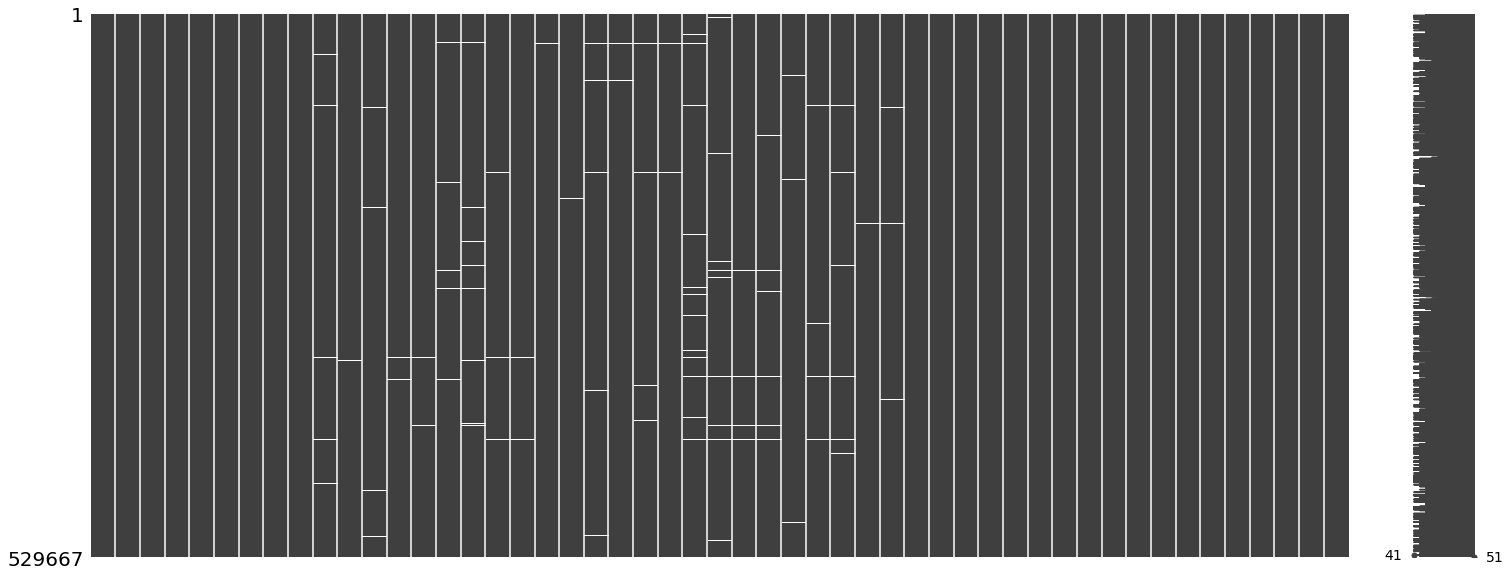

In [68]:
df_2019nn2_drop.reset_index(drop=True)
msno.matrix(df_2019nn2_drop)

In [64]:
print(max(index_nans))
df_2019nn2.shape
df_2019nn2_drop_analysis = df_2019nn2.iloc[index_nans,:]

566336


In [66]:
df_2019nn2_drop_analysis.tail()

index ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
566297  567239          COLOMBIA           F           1997-09-16   
566311  567253          COLOMBIA           F           2002-07-17   
566328  567270          COLOMBIA           F           2003-06-17   
566330  567272          COLOMBIA           F           1999-08-22   
566336  567278          COLOMBIA           M           1999-10-07   

       ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_ETNIA ESTU_DEPTO_RESIDE  \
566297         COLOMBIA              No    Ninguno             VALLE   
566311         COLOMBIA              Si      Wayúu        LA GUAJIRA   
566328         COLOMBIA              No    Ninguno            TOLIMA   
566330         COLOMBIA              No    Ninguno             CAUCA   
566336         COLOMBIA              No    Ninguno         SANTANDER   

       ESTU_MCPIO_RESIDE FAMI_ESTRATOVIVIENDA FAMI_PERSONASHOGAR  \
566297              CALI                  NaN              5 a 6   
566311            MAICAO                  NaN              7 a 8   
566328            ROVIRA          Sin Estrato                NaN   
566330           BOLÍVAR                  NaN                NaN   
566336        VILLANUEVA                  NaN                NaN   

       FAMI_CUARTOSHOGAR               FAMI_EDUCACIONPADRE  \
566297               Uno                               NaN   
566311            Cuatro                               NaN   
566328               NaN  Técnica o tecnológica incompleta   
566330               NaN                               NaN   
566336               NaN                               NaN   

       FAMI_EDUCACIONMADRE                             FAMI_TRABAJOLABORPADRE  \
566297                 NaN  Es dueño de un negocio pequeño (tiene pocos em...   
566311                 NaN  Es dueño de un negocio grande, tiene un cargo ...   
566328   Primaria completa                                                NaN   
566330                 NaN                                                NaN   
566336                 NaN                                                NaN   

                                   FAMI_TRABAJOLABORMADRE FAMI_TIENEINTERNET  \
566297  Tiene un trabajo de tipo auxiliar administrati...                NaN   
566311          Trabaja en el hogar, no trabaja o estudia                NaN   
566328                                                NaN                 Si   
566330                                                NaN                NaN   
566336                                                NaN                NaN   

       FAMI_TIENESERVICIOTV FAMI_TIENECOMPUTADOR FAMI_TIENELAVADORA  \
566297                  NaN                   Si                 No   
566311                  NaN                   Si                 Si   
566328                   No                  NaN                NaN   
566330                  NaN                  NaN                NaN   
566336                  NaN                  NaN                NaN   

       FAMI_TIENEHORNOMICROOGAS FAMI_TIENEAUTOMOVIL FAMI_TIENEMOTOCICLETA  \
566297                       Si                  Si                    Si   
566311                       Si                  Si                    No   
566328                      NaN                 NaN                   NaN   
566330                      NaN                 NaN                   NaN   
566336                      NaN                 NaN                   NaN   

       FAMI_TIENECONSOLAVIDEOJUEGOS   FAMI_NUMLIBROS FAMI_COMELECHEDERIVADOS  \
566297                           Si              NaN                     NaN   
566311                           No              NaN                     NaN   
566328                          NaN  26 A 100 LIBROS                     NaN   
566330                          NaN              NaN                     NaN   
566336                          NaN              NaN                     NaN   

         FAMI_COMECARNEPESCADOHUEVO FAMI

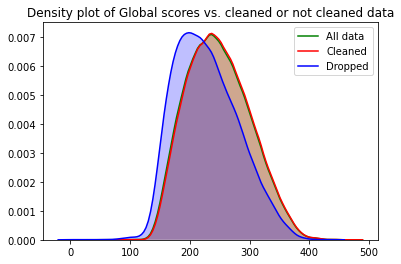

In [69]:
# First, plot parking vs. non-parking prices.
sns.kdeplot(df_2019_new['PUNT_GLOBAL'],shade = True, label="All data",color="g")
sns.kdeplot(df_2019nn2_drop['PUNT_GLOBAL'],shade = True, label="Cleaned",color="r")
sns.kdeplot(df_2019nn2_drop_analysis['PUNT_GLOBAL'],shade = True, label="Dropped",color="b")

plt.title("Density plot of Global scores vs. cleaned or not cleaned data");

In [89]:
import scipy.stats as stats
pearson_coef,p_value = stats.pearsonr(df_2019nn2_drop['PUNT_GLOBAL'].sample(n=30000, random_state=1),
                                      df_2019nn2_drop_analysis['PUNT_GLOBAL'].sample(n=30000, random_state=1))
pearson_coef,p_value

(0.0027139678155878736, 0.6383162280942554)

In [90]:
stats.pearsonr(df_2019nn2_drop['PUNT_GLOBAL'].sample(n=30000, random_state=1),
                                      df_2019nn2_drop_analysis['PUNT_GLOBAL'].sample(n=30000, random_state=1))

(0.0027139678155878736, 0.6383162280942554)

basicamente he hecho: eliminar columnas que no nos dan información importante, tomar columnas que corresponden a IDs (de estas no vamos a hacer análisis, pero sirven como IDs...), he quitado temporalmente las columnas de los puntajes intermedios (osea, dejando sólo los puntajes globales) y estoy mirando las gráficas con datos NaNs. Parece que ciertos sujetos tienen varios NaNs, estuve intentando remover filas con sujetos > 10 NaNs

Falta pasar de columnas categóricas a numéricas, y unir las columnas de una misma definición (como nutrición) en una sola variable. 

In [ ]:
# numeric_cols = ['PUNT_LECTURA_CRITICA',
# 'PERCENTIL_LECTURA_CRITICA',
# 'DESEMP_LECTURA_CRITICA',
# 'PUNT_MATEMATICAS',
# 'PERCENTIL_MATEMATICAS',
# 'DESEMP_MATEMATICAS',
# 'PUNT_C_NATURALES',
# 'PERCENTIL_C_NATURALES',
# 'DESEMP_C_NATURALES',
# 'PUNT_SOCIALES_CIUDADANAS',
# 'PERCENTIL_SOCIALES_CIUDADANAS',
# 'DESEMP_SOCIALES_CIUDADANAS',
# 'PUNT_INGLES',
# 'PERCENTIL_INGLES',
# #'DESEMP_INGLES',
# 'PUNT_GLOBAL',
# 'PERCENTIL_GLOBAL']
# #'ESTU_INSE_INDIVIDUAL',
# #'ESTU_NSE_ESTABLECIMIENTO'],
# #'ESTU_NSE_INDIVIDUAL']

# for col in  numeric_cols:
#     df_2019[col] = df_2019[col].astype(str).replace('None', None).astype(float)
# df_2019

# Analysis within the dataset - EDA

## Small results within the scores of the test

Text(0.5, 1.0, 'PERCENTIL_GLOBAL')

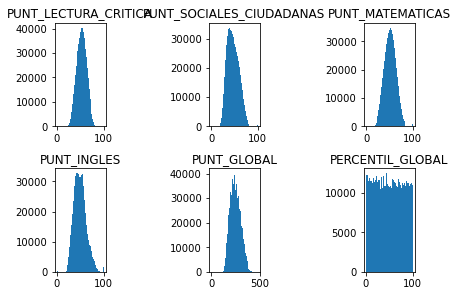

In [273]:
fig, axs = plt.subplots(2,3,constrained_layout=True)
axs[0, 0].hist(df_2019_new['PUNT_LECTURA_CRITICA'], bins = 50)
axs[0, 0].set_title("PUNT_LECTURA_CRITICA")
axs[1, 0].hist(df_2019_new['PUNT_INGLES'], bins = 50)
axs[1, 0].set_title("PUNT_INGLES")
axs[0, 1].hist(df_2019_new['PUNT_SOCIALES_CIUDADANAS'], bins = 50)
axs[0, 1].set_title("PUNT_SOCIALES_CIUDADANAS")
axs[0, 2].hist(df_2019_new['PUNT_MATEMATICAS'], bins = 50)
axs[0, 2].set_title("PUNT_MATEMATICAS")
axs[1, 1].hist(df_2019_new['PUNT_GLOBAL'], bins = 50)
axs[1, 1].set_title("PUNT_GLOBAL")
axs[1, 2].hist(df_2019_new['PERCENTIL_GLOBAL'], bins = 50)
axs[1, 2].set_title("PERCENTIL_GLOBAL")

#plt.figure(figsize=(100,300))
#fig.tight_layout
#plt.figure.autolayout()

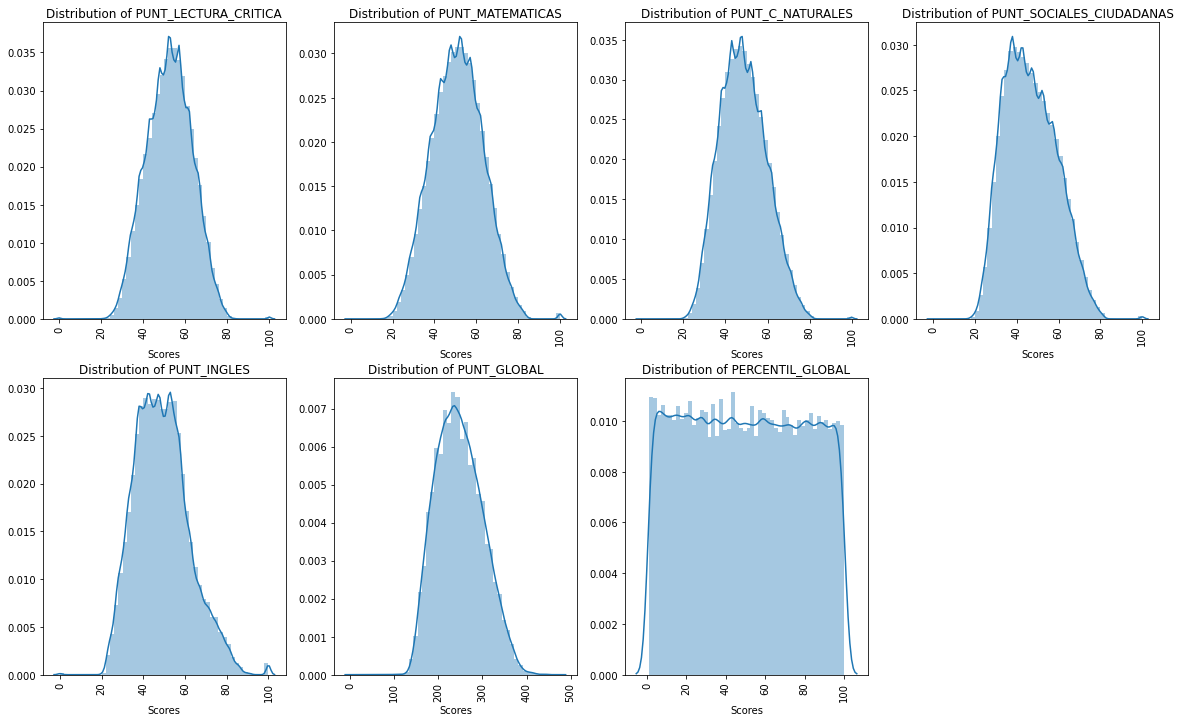

In [274]:
plt.figure(figsize=(20,12))
list_scores=['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
             'PUNT_INGLES','PUNT_GLOBAL','PERCENTIL_GLOBAL']
for i, var in enumerate(list_scores):
#     df_2019_df_tt = df_2019_new_nscores_drop
#     Emissions_C_df_box =pd.DataFrame(Emissions_C_df_tt[Emissions_C_df_tt['Indicator Code']==var])
    x=df_2019_new[var].to_list()
    plt.subplot(2,4,i+1)
    sns.distplot(x)
    title_string = "Distribution of " + var
    #plt.ylabel("Students")
    plt.xlabel("Scores")
    plt.xticks(rotation=90)
    plt.title(title_string)


In [ ]:
#Box plots of the scores
plt.figure(figsize=(20,12))
list_scores=['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
             'PUNT_INGLES','PUNT_GLOBAL','PERCENTIL_GLOBAL']
xtemp = df_2019_new[list_scores]
xtemp['PUNT_GLOBAL']=xtemp['PUNT_GLOBAL']/5
xtemp.boxplot(column=list_scores)
plt.ylabel("Scores")

In [ ]:
df_2019_new['PUNT_GLOBAL'].max()

In [ ]:
import seaborn as sns

list_scores1 = ['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS',
                'PUNT_INGLES','PUNT_GLOBAL']
f, ax = plt.subplots(figsize=(12, 12))
corr = df_2019_new[list_scores1].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 1, as_cmap=True),
            square=True, ax=ax, annot=True)

### Analysis of the socio-economical features of the students and their families

In [92]:
df_2019_new.columns

Index(['index', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_CONSECUTIVO', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',
       'COLE_COD_DANE_ESTABLECIMIENT

In [93]:
vars_to_plot = df_2019_new.loc[:,'FAMI_ESTRATOVIVIENDA':'FAMI_CUARTOSHOGAR'].columns
vars_to_plot

Index(['FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR'], dtype='object')

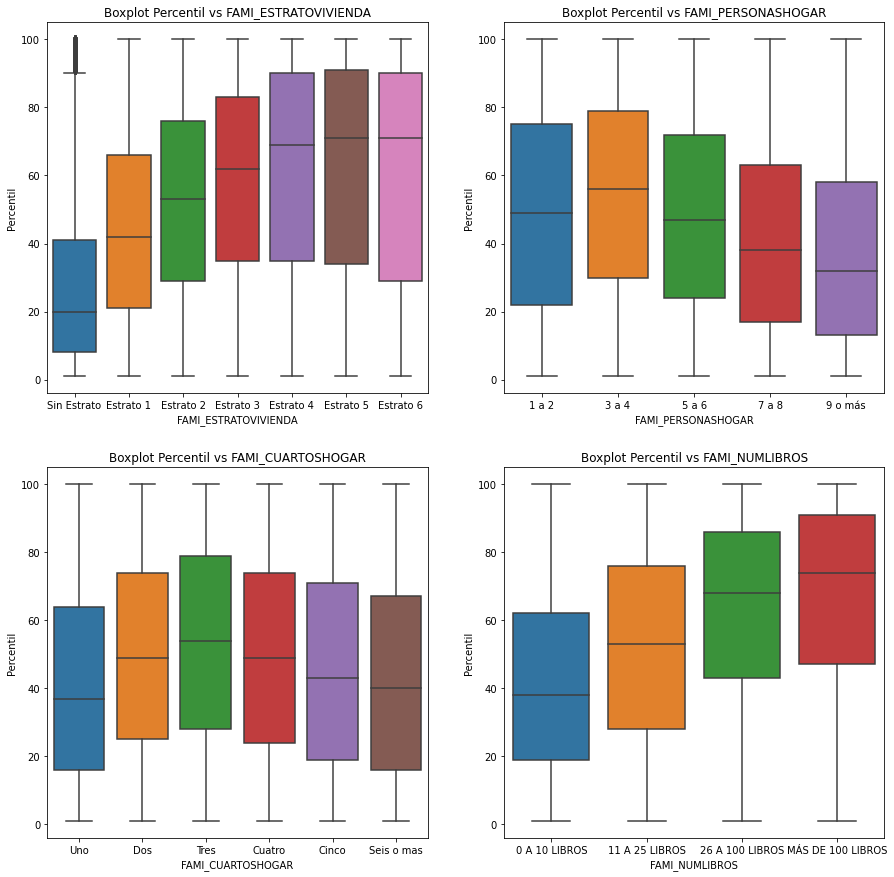

In [94]:
# Analisis descriptivo de: Estrato, numero de personas en la familia y cuartos y num libros
plt.figure(figsize=(15,15))
vars_to_plot = df_2019_new.loc[:,['FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR','FAMI_NUMLIBROS']].columns
#vars_to_plot = vars_to_plot.append('')
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x =var, y='PERCENTIL_GLOBAL', data = df_2019_new, order=order_categorical_variables1[var])
    title_string = "Boxplot Percentil vs " + var
    plt.ylabel("Percentil")
#     plt.xlabel("Percentil")
    #plt.xticks(np.arange(len(odrer_categorical_variables1[var])),odrer_categorical_variables1[var])
    plt.title(title_string)

In [95]:
# Validacion de la exclusion del numero de personas en la familia
import scipy.stats as stats
stats.f_oneway(df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_PERSONASHOGAR'] == '1 a 2'],
               df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_PERSONASHOGAR'] == '3 a 4'],
               df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_PERSONASHOGAR'] == '5 a 6'],
               df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_PERSONASHOGAR'] == '7 a 8'],
               df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_PERSONASHOGAR'] == '9 o mÃ¡s'])

C:\Users\Api\anaconda3\envs\case_20.1\lib\site-packages\scipy\stats\stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


F_onewayResult(statistic=nan, pvalue=nan)

In [96]:
# Validacion de la exclusion del numero de cuartos
import scipy.stats as stats
stats.f_oneway(df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Uno'],
               df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Dos'],
               df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Tres'],
               df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Cuatro'],
               df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Cinco'],
               df_2019_new['PERCENTIL_GLOBAL'][df_2019_new['FAMI_CUARTOSHOGAR'] == 'Seis o mas'])

F_onewayResult(statistic=nan, pvalue=nan)

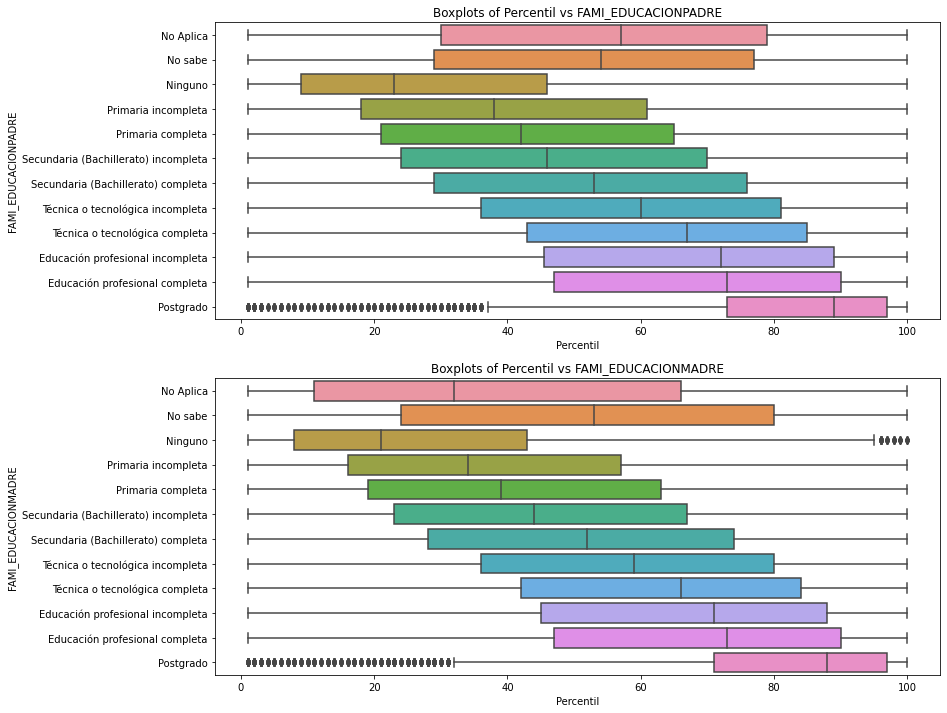

In [98]:
# Analisis descriptivo de: Educacion del Padre y la Madre
plt.figure(figsize=(13,12))
vars_to_plot = df_2019_new.loc[:,'FAMI_EDUCACIONPADRE':'FAMI_EDUCACIONMADRE'].columns
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,1,i+1)
    sns.boxplot(x = 'PERCENTIL_GLOBAL', y=var, data = df_2019_new,order=order_categorical_variables1[var])
    title_string = "Boxplots of Percentil vs " + var
    plt.xlabel("Percentil")
    plt.title(title_string)
    #plt.xticks(rotation=45)

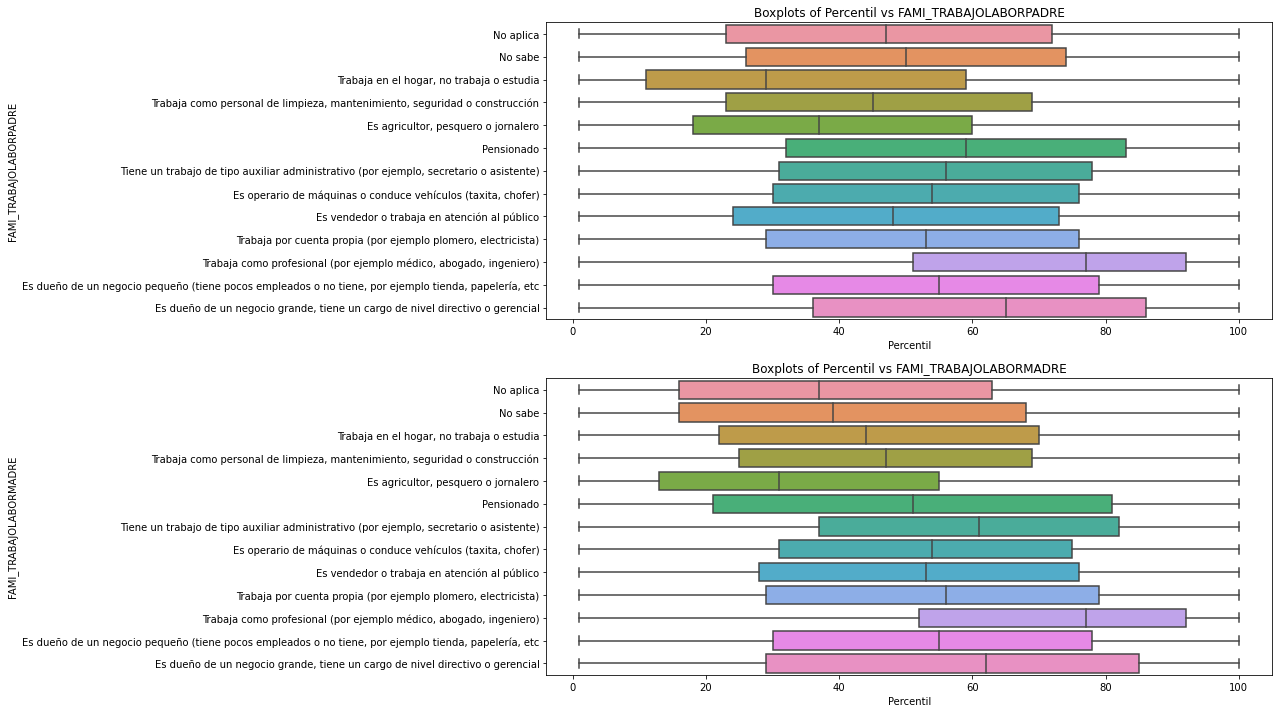

In [100]:
# Analisis descriptivo del: Tipo de trabajo del Padre y la Madre
plt.figure(figsize=(13,12))
vars_to_plot = df_2019_new.loc[:,'FAMI_TRABAJOLABORPADRE':'FAMI_TRABAJOLABORMADRE'].columns
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,1,i+1)
    sns.boxplot(x = 'PERCENTIL_GLOBAL', y=var, data = df_2019_new,order=order_categorical_variables1[var])
    title_string = "Boxplots of Percentil vs " + var
    plt.xlabel("Percentil")
    plt.title(title_string)
#     plt.xticks(rotation=90)

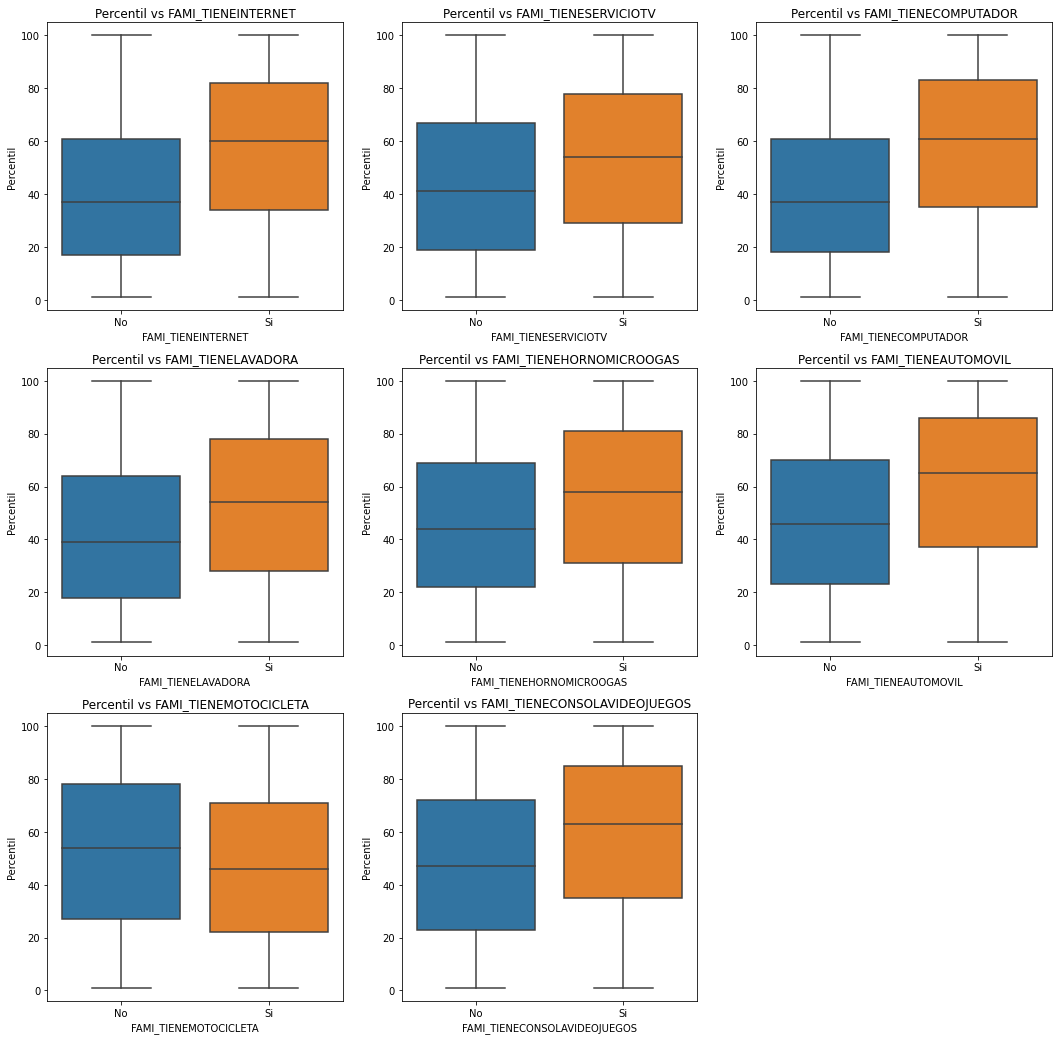

In [103]:
# Analisis descriptivo de: Acceso a internet, TV, PC, Microhondas, Auto familiar, motocicleta familiar, videojuegos, Libros
plt.figure(figsize=(18,18))
vars_to_plot = df_2019_new.loc[:,'FAMI_TIENEINTERNET':'FAMI_TIENECONSOLAVIDEOJUEGOS'].columns
for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = var, y='PERCENTIL_GLOBAL', data = df_2019_new,order=order_categorical_variables1[var])
    title_string = "Percentil vs " + var
    plt.ylabel("Percentil")
    plt.title(title_string)

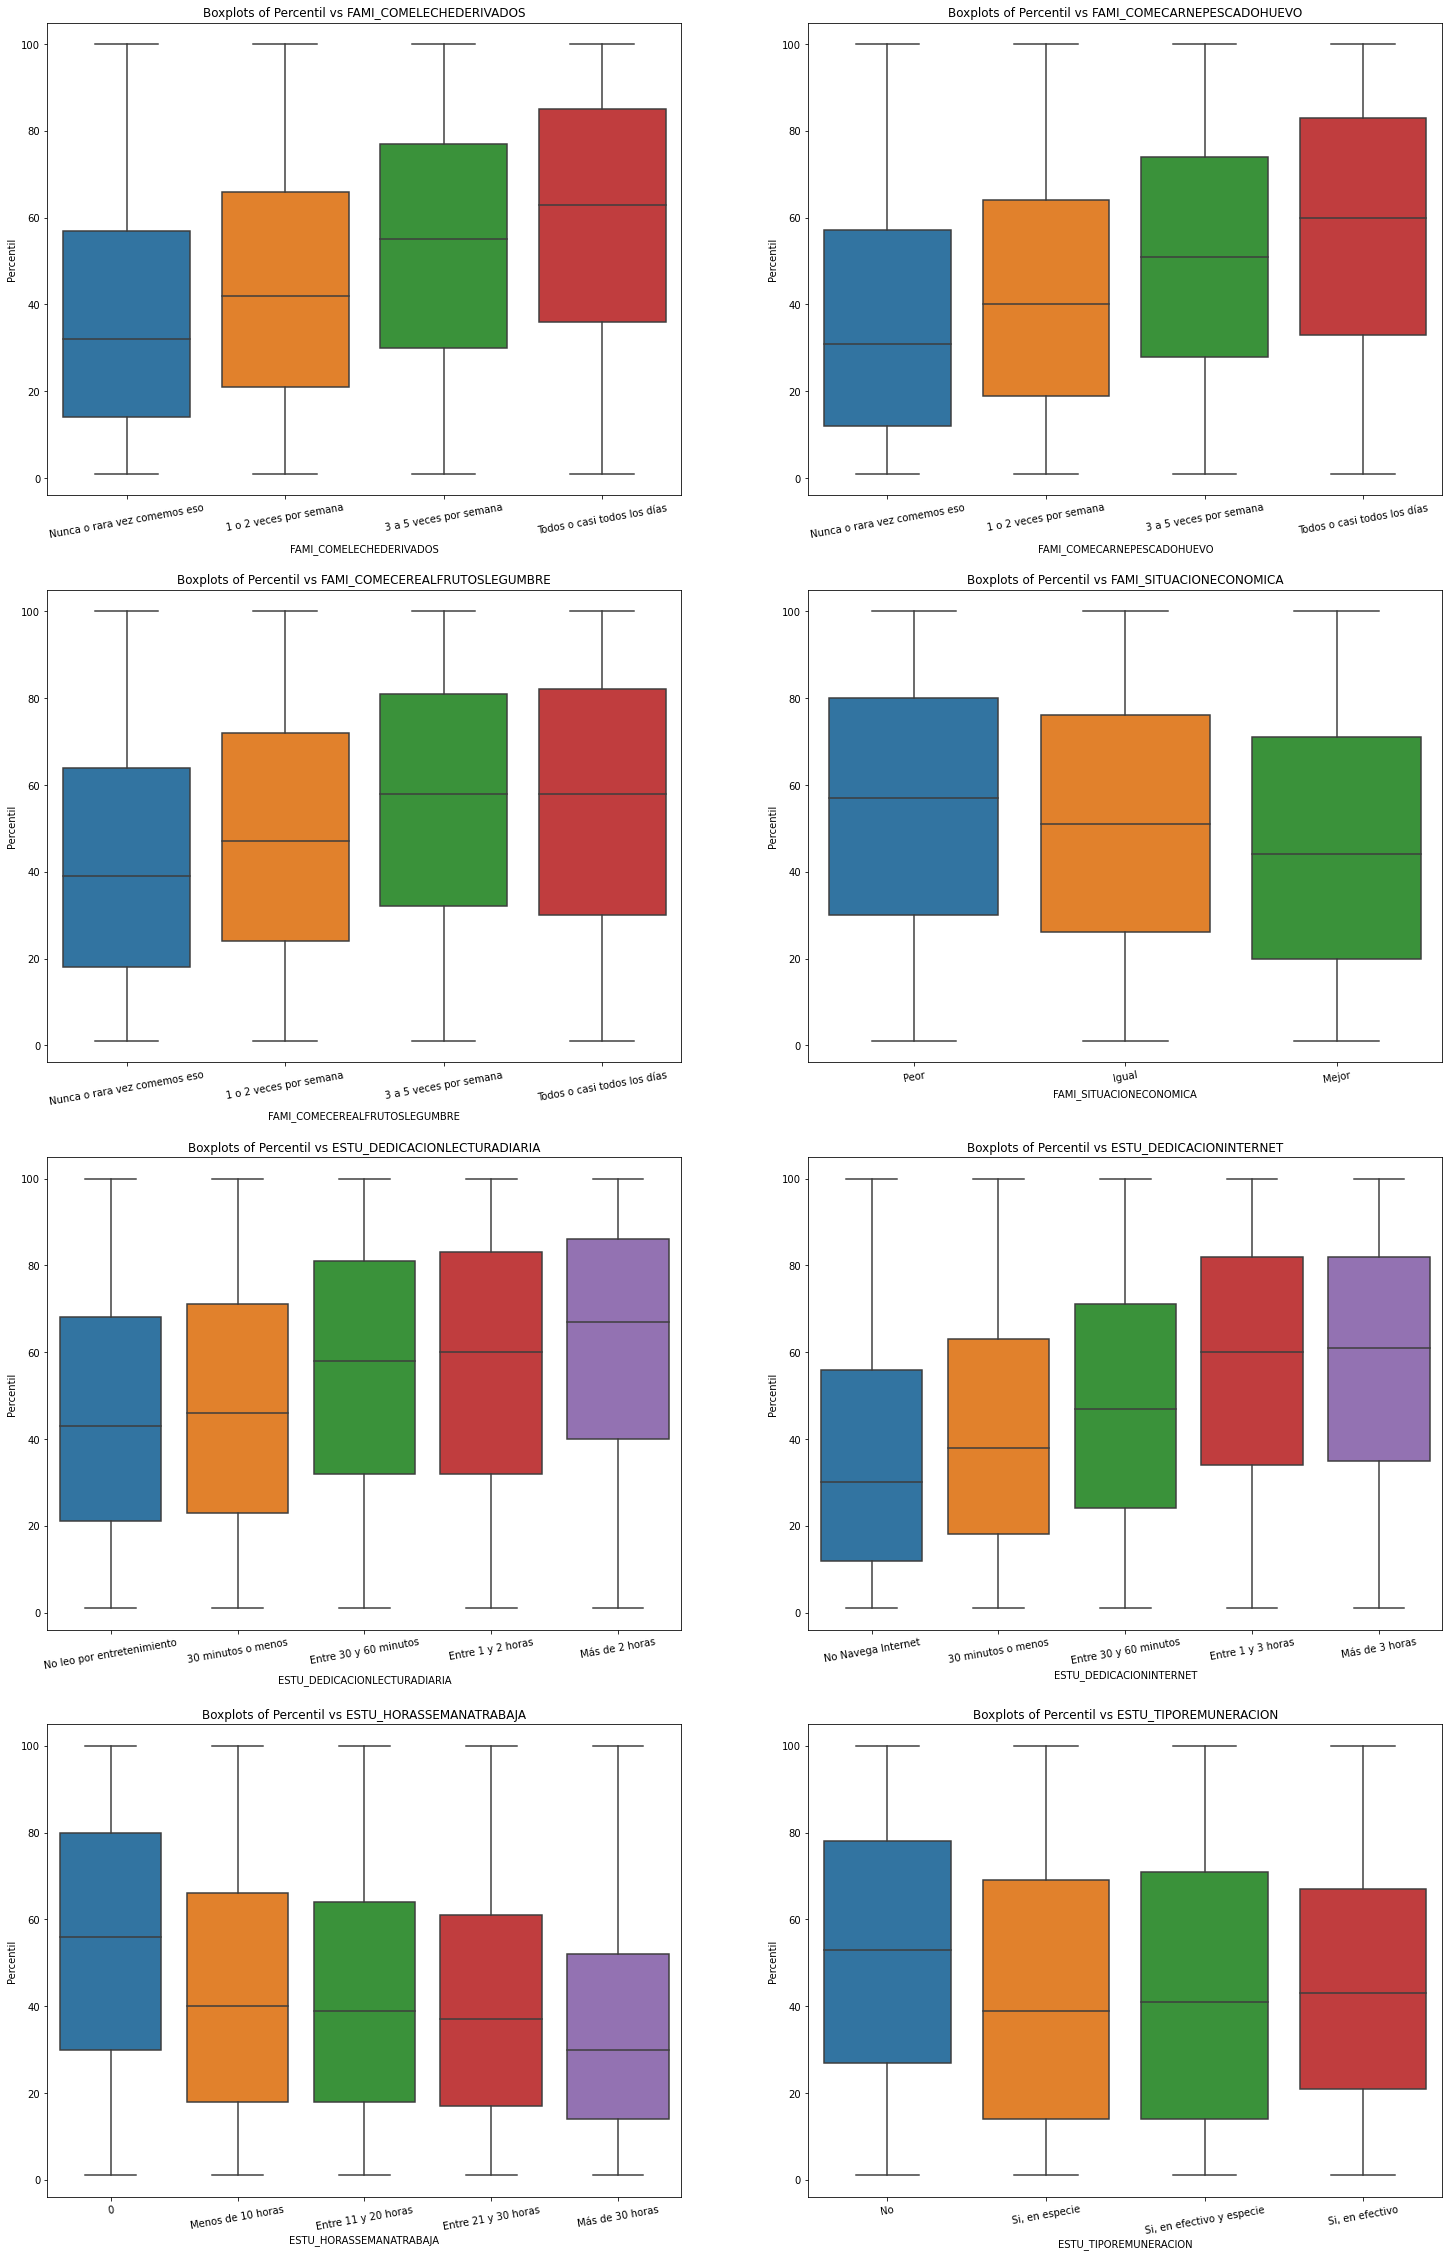

In [113]:
# Analisis descriptivo de: Tipo de alimentacion, situacion economica, educacion diaria, dedicacion a internet diaria, trabajo u remuneracion
plt.figure(figsize=(25,40))
vars_to_plot = df_2019_new.loc[:,'FAMI_COMELECHEDERIVADOS':'ESTU_TIPOREMUNERACION'].columns
for i, var in enumerate(vars_to_plot):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = var, y='PERCENTIL_GLOBAL', data = df_2019_new,order=order_categorical_variables1[var])
    title_string = "Boxplots of Percentil vs " + var
    plt.ylabel("Percentil")
    plt.xticks(rotation=10)
    plt.title(title_string)

## Turning some ordinal variables into numbers

In [107]:
order_categorical_variables1 = {
    'FAMI_ESTRATOVIVIENDA':['Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6'],
    'FAMI_PERSONASHOGAR':['1 a 2', '3 a 4', '5 a 6', '7 a 8', '9 o más'],
    'FAMI_CUARTOSHOGAR': ['Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis o mas'],
    'FAMI_EDUCACIONPADRE': ['No Aplica', 'No sabe', 'Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'],
    'FAMI_EDUCACIONMADRE': ['No Aplica', 'No sabe', 'Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'],
    'FAMI_NUMLIBROS': ['0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS'],
    'FAMI_COMELECHEDERIVADOS': ['Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_COMECARNEPESCADOHUEVO': ['Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_COMECEREALFRUTOSLEGUMBRE': ['Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_SITUACIONECONOMICA': ['Peor', 'Igual', 'Mejor'],
    'ESTU_DEDICACIONLECTURADIARIA': ['No leo por entretenimiento', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 2 horas', 'Más de 2 horas'],
    'ESTU_DEDICACIONINTERNET': ['No Navega Internet', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 3 horas', 'Más de 3 horas'],
    'ESTU_HORASSEMANATRABAJA': ['0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas'], 
        'ESTU_GENERO' : ['F', 'M'],
    'ESTU_TIENEETNIA' : ['No', 'Si'],
    'ESTU_ETNIA' : ['Arhuaco', 'Cancuamo', 'Comunidad afrodescendiente', 'Comunidades Rom (Gitanas)',
                    'Cubeo', 'Emberá', 'Guambiano', 'Huitoto', 'Inga', 'Paez', 'Palenquero', 'Pasto',
                    'Pijao', 'Raizal', 'Sikuani', 'Tucano', 'Wayúu', 'Zenú', 'Otro grupo étnico minoritario','Ninguno'],
    'FAMI_TRABAJOLABORPADRE' : ['No aplica','No sabe',
                                'Trabaja en el hogar, no trabaja o estudia',
                                'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
                                'Es agricultor, pesquero o jornalero',
                                'Pensionado',
                                'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
                                'Es operario de máquinas o conduce vehículos (taxita, chofer)',
                                'Es vendedor o trabaja en atención al público',
                                'Trabaja por cuenta propia (por ejemplo plomero, electricista)',
                                'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)',
                                'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc',
                                'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial'],
    'FAMI_TRABAJOLABORMADRE' : ['No aplica','No sabe',
                                'Trabaja en el hogar, no trabaja o estudia',
                                'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
                                'Es agricultor, pesquero o jornalero',
                                'Pensionado',
                                'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
                                'Es operario de máquinas o conduce vehículos (taxita, chofer)',
                                'Es vendedor o trabaja en atención al público',
                                'Trabaja por cuenta propia (por ejemplo plomero, electricista)',
                                'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)',
                                'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc',
                                'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial'],
    'FAMI_TIENEINTERNET': ['No','Si'],
    'FAMI_TIENESERVICIOTV' : ['No','Si'],
    'FAMI_TIENECOMPUTADOR' : ['No','Si'],
    'FAMI_TIENELAVADORA' : ['No','Si'],
    'FAMI_TIENEHORNOMICROOGAS' : ['No','Si'],
    'FAMI_TIENEAUTOMOVIL' : ['No','Si'],
    'FAMI_TIENEMOTOCICLETA' : ['No','Si'],
    'FAMI_TIENECONSOLAVIDEOJUEGOS' : ['No','Si'],
    'ESTU_TIPOREMUNERACION':['No', 'Si, en especie','Si, en efectivo y especie','Si, en efectivo']

}    


In [ ]:
#Code from Felipe
#In the meantime we are setting the NaNs values as No Data, but this needs to be evaluated further
df_2019_no_nan = df_2019_new.fillna('No data')

oder_categorical_variables = {
    'FAMI_ESTRATOVIVIENDA':['No data', 'Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6'],
    'FAMI_PERSONASHOGAR':['No data', '1 a 2', '3 a 4', '5 a 6', '7 a 8', '9 o más'],
    'FAMI_CUARTOSHOGAR': ['No data','Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis o mas'],
    'FAMI_EDUCACIONPADRE': ['No data', 'No Aplica', 'No sabe', 'Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'],
    'FAMI_EDUCACIONMADRE': ['No data', 'No Aplica', 'No sabe', 'Ninguno', 'Primaria incompleta', 'Primaria completa', 'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa', 'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'],
    'FAMI_NUMLIBROS': ['No data', '0 A 10 LIBROS', '11 A 25 LIBROS', '26 A 100 LIBROS', 'MÁS DE 100 LIBROS'],
    'FAMI_COMELECHEDERIVADOS': ['No data', 'Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_COMECARNEPESCADOHUEVO': ['No data', 'Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_COMECEREALFRUTOSLEGUMBRE': ['No data', 'Nunca o rara vez comemos eso', '1 o 2 veces por semana', '3 a 5 veces por semana', 'Todos o casi todos los días'],
    'FAMI_SITUACIONECONOMICA': ['No data', 'Peor', 'Igual', 'Mejor'],
    'ESTU_DEDICACIONLECTURADIARIA': ['No data', 'No leo por entretenimiento', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 2 horas', 'Más de 2 horas'],
    'ESTU_DEDICACIONINTERNET': ['No data', 'No Navega Internet', '30 minutos o menos', 'Entre 30 y 60 minutos', 'Entre 1 y 3 horas', 'Más de 3 horas'],
    'ESTU_HORASSEMANATRABAJA': ['No data', '0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas'], 
}

# columnas_irrelevantes = [
#     'ESTU_ESTUDIANTE', # Solo tiene un valor
#     'ESTU_COD_RESIDE_DEPTO', #Es un codigo, pero ya tenemos el nombre del dpto
#     'ESTU_COD_RESIDE_MCPIO', #Mismo de arriba
#     'COLE_CODIGO_ICFES', #Ya tenemos el nombre del colegio
#     'COLE_COD_DANE_ESTABLECIMIENTO', #Misma de arriba
#     'COLE_COD_DANE_SEDE', #No da info adicional, salvo si el colegio tiene diferentes sedes
#     'COLE_NOMBRE_SEDE', #Mismo de arriba
#     'COLE_COD_MCPIO_UBICACION', #Solo daría información en caso de que el estudiante se tenga que desplazar desde su municipio a otro para ir al colegio
#     'COLE_MCPIO_UBICACION', #Mismo de arriba
#     'COLE_COD_DEPTO_UBICACION', #Mismo de arriba
#     'COLE_DEPTO_UBICACION', #Mismo de arriba
# ]

df_2019_ordinal = df_2019_no_nan.copy()

#Este código reemplaza las categoricas ordinales por númericas

for column in oder_categorical_variables:
    for index, value in enumerate(oder_categorical_variables[column]):
        mask = df_2019_ordinal[column] == value
        df_2019_ordinal.loc[mask, column] = str(index)
    df_2019_ordinal[column] = df_2019_ordinal[column].astype(int)

In [ ]:
df_2019_ordinal.columns

In [106]:
df_xxxx=df_2019_new['ESTU_TIPOREMUNERACION'].unique()
df_xxxx
# print(np.sort(df_xxxx))

array(['No', 'Si, en efectivo', 'Si, en especie', nan,
       'Si, en efectivo y especie'], dtype=object)

In [ ]:
import seaborn as sns

# columns_scores_percentiles = [
#     'PERCENTIL_LECTURA_CRITICA', 
#     'PERCENTIL_MATEMATICAS', 
#     'PERCENTIL_C_NATURALES', 
#     'PERCENTIL_SOCIALES_CIUDADANAS', 
#     'PERCENTIL_INGLES', 
#     'PERCENTIL_GLOBAL']

column_scores = [
    'PUNT_GLOBAL']

f, ax = plt.subplots(figsize=(12, 12))
corr = df_2019_ordinal[list(oder_categorical_variables.keys()) + column_scores].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 1, as_cmap=True),
            square=True, ax=ax, annot=True)

## Analysis with the map of Colombia (Departments and Municipalities)

In [142]:
with open('Data/DptoGeo_FeaturesToJSON.json') as geo1:
    geodept = json.loads(geo1.read())
with open('Data/Mpio_geo_FeaturesToJSON.json') as geo2:
    geompio = json.loads(geo2.read())


for i, each in enumerate(geodept["features"]):
    geodept["features"][i]['id']=geodept["features"][i]['properties']['DPTO']

for i, each in enumerate(geompio['features']):
    geompio['features'][i]['id']=geompio['features'][i]['properties']['MPIOS']



In [269]:
pd.options.display.max_columns = None
df_2019_new['ESTU_COD_RESIDE_DEPTO_str']=df_2019_new['ESTU_COD_RESIDE_DEPTO'].apply(lambda x: str("%02d" % x))
df_2019_new['ESTU_COD_RESIDE_MCPIO_str']=df_2019_new['ESTU_COD_RESIDE_MCPIO'].apply(lambda x: str("%05d" % x))
df_2019_new
dff=df_2019_new.groupby('ESTU_COD_RESIDE_DEPTO_str').mean().reset_index()
dff = dff.iloc[:-1,:]
df_2019_new
df_2019_new['ESTU_COD_RESIDE_DEPTO'].unique()
# df_2019_new[df_2019_new['ESTU_COD_RESIDE_DEPTO']==88]
#dff1 = dff.iloc[1,:]

array([7.6000e+01, 1.1000e+01, 2.5000e+01, 6.8000e+01, 1.5000e+01,
       6.6000e+01, 1.8000e+01, 8.0000e+00, 1.7000e+01, 2.0000e+01,
       5.0000e+00, 8.1000e+01, 8.5000e+01, 1.9000e+01, 4.1000e+01,
       5.2000e+01, 5.0000e+01, 9.4000e+01, 5.4000e+01, 7.3000e+01,
       6.3000e+01, 1.3000e+01, 7.0000e+01, 4.7000e+01, 4.4000e+01,
       2.3000e+01, 8.6000e+01, 2.7000e+01, 9.5000e+01, 9.9000e+01,
       8.8000e+01, 9.7000e+01, 9.1000e+01, 9.9999e+04])

In [126]:
dff1 = pd.DataFrame(dff.iloc[1:2,:])
# dff1 = pd.Dataframe(dff1)
dff1

ESTU_COD_RESIDE_DEPTO_str  ESTU_COD_RESIDE_DEPTO  ESTU_COD_RESIDE_MCPIO  \
1                        08                    8.0            8276.592878   

   COLE_CODIGO_ICFES  COLE_COD_DANE_ESTABLECIMIENTO  COLE_COD_DANE_SEDE  \
1      314431.269126                   1.804042e+11        1.804984e+11   

   COLE_COD_MCPIO_UBICACION  COLE_COD_DEPTO_UBICACION  PUNT_LECTURA_CRITICA  \
1               8326.598347                  8.037887             51.705536   

   PERCENTIL_LECTURA_CRITICA  ...  PERCENTIL_SOCIALES_CIUDADANAS  \
1                  48.345658  ...                      47.630643   

   DESEMP_SOCIALES_CIUDADANAS  PUNT_INGLES  PERCENTIL_INGLES  PUNT_GLOBAL  \
1                     1.85453     48.84818         49.993073   243.262016   

   PERCENTIL_GLOBAL  ESTU_INSE_INDIVIDUAL  ESTU_NSE_INDIVIDUAL  \
1         47.603938             51.475111             2.464506   

   ESTU_NSE_ESTABLECIMIENTO  ESTU_Edad  
1                  2.470195  17.690934  

[1 rows x 28 columns]

In [272]:
# dff=df_2019_new.groupby('ESTU_COD_RESIDE_DEPTO_str').sum().reset_index()

#Here we can see the syntax used for the creation of choropleth maps:
px.choropleth_mapbox(dff,                         #Data
        locations='ESTU_COD_RESIDE_DEPTO_str',        #Column containing the identifiers used in the GeoJSON file 
        color='PUNT_GLOBAL',                            #Column giving the color intensity of the region
        geojson=geodept,                          #The GeoJSON file
        zoom=4,                                   #Zoom
        mapbox_style="carto-positron",            #Mapbox style, for different maps you need a Mapbox account and a token
        center= {"lat": 4.570868, "lon": -74.2973328}, #Center
        color_continuous_scale="Viridis",         #Color Scheme
        opacity=0.5,                              #Opacity of the map
        )

In [178]:
# import plotly.graph_objects as go

# fig = go.Figure(go.Choroplethmapbox(geojson=geodept, 
#                                         locations=dff['ESTU_COD_RESIDE_DEPTO_str'],
#                                         z=dff['PUNT_GLOBAL'],
#                                         colorscale="Viridis",
#                                         text='test',
#                                         marker_opacity=0.5, 
#                                         marker_line_width=0))
# fig.update_layout(
#     mapbox_style="carto-positron",
#     mapbox_zoom=4, 
#     mapbox_center = {"lat": 4.570868, "lon": -74.2973328})
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [179]:
# import folium  #needed for interactive map
# from folium.plugins import HeatMap

# folium_map = folium.Map(location=[4.624335, -74.063],
#                         zoom_start=5,
#                         tiles="OpenStreetMap",
#                         crs='EPSG3857')
# folium_map


In [180]:
df_munip = df_2019_new[['ESTU_DEPTO_RESIDE','ESTU_COD_RESIDE_DEPTO_str','ESTU_MCPIO_RESIDE','ESTU_COD_RESIDE_MCPIO_str']]
df_munip
df_mnps = df_munip.groupby(['ESTU_MCPIO_RESIDE']).agg(lambda x:x.value_counts().index[0]).reset_index()
df_mnps

ESTU_MCPIO_RESIDE ESTU_DEPTO_RESIDE ESTU_COD_RESIDE_DEPTO_str  \
0            ABEJORRAL         ANTIOQUIA                        05   
1             ABRIAQUÍ         ANTIOQUIA                        05   
2              ACACÍAS              META                        50   
3               ACANDÍ             CHOCO                        27   
4              ACEVEDO             HUILA                        41   
...                ...               ...                       ...   
1026     ZONA BANANERA         MAGDALENA                        47   
1027            ÁBREGO   NORTE SANTANDER                        54   
1028            ÍQUIRA             HUILA                        41   
1029            ÚMBITA            BOYACA                        15   
1030             ÚTICA      CUNDINAMARCA                        25   

     ESTU_COD_RESIDE_MCPIO_str  
0                        05002  
1                        05004  
2                        50006  
3                        27006  
4                        41006  
...                        ...  
1026                     47980  
1027                     54003  
1028                     41357  
1029                     15842  
1030                     25851  

[1031 rows x 4 columns]

In [218]:
#Extract lat and long from the geo files

df_municipios = pd.DataFrame()
# df_temp = pd.DataFrame()
for i, each in enumerate(geompio['features']):
    Municipio = geompio['features'][i]['properties']['NOMBRE_MPI']
    Municipio_id = geompio['features'][i]['properties']['MPIOS']
    Departamento = geompio['features'][i]['properties']['NOMBRE_DPT']
    Departamento_id = geompio['features'][i]['properties']['DPTO']
    df_temp = pd.DataFrame({'Municipio': Municipio,
                            'Municipio_id':Municipio_id,
                            'Departamento':Departamento,
                            'Departamento_id':Departamento_id},
                          index=[i])
    df_municipios=df_municipios.append(df_temp)
    


In [216]:
df_municipios

Municipio Municipio_id  \
0                URIBIA        44847   
1               MANAURE        44560   
2                MAICAO        44430   
3              RIOHACHA        44001   
4               DIBULLA        44090   
...                 ...          ...   
1117             MUTATA        05480   
1118  CARMEN DEL DARIEN        27150   
1119         SAN ANDRES        88001   
1120     SANTA CATALINA        88000   
1121        PROVIDENCIA        88564   

                                           Departamento Departamento_id  
0                                            LA GUAJIRA              44  
1                                            LA GUAJIRA              44  
2                                            LA GUAJIRA              44  
3                                            LA GUAJIRA              44  
4                                            LA GUAJIRA              44  
...                                                 ...             ...  
1117                                          ANTIOQUIA              05  
1118                                              CHOCO              27  
1119  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...              88  
1120  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...              88  
1121  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...              88  

[1122 rows x 4 columns]

In [258]:

df_departamentos = pd.DataFrame()
df_temp1= pd.DataFrame()
for i, each in enumerate(geodept["features"]):
    Departamento = geodept['features'][i]['properties']['NOMBRE_DPT']
    Departamento_id = geodept['features'][i]['properties']['DPTO']
    lat_long_mean = np.mean(geodept['features'][i]['geometry']['coordinates'][0],0)
    longitude = lat_long_mean[0]
    latitude = lat_long_mean[1]
    if np.size(longitude) != 1:
        lat_long_mean = np.mean(geodept['features'][i]['geometry']['coordinates'][0][0],0)
        longitude = lat_long_mean[0]
        latitude = lat_long_mean[1]

    df_temp1 = pd.DataFrame({'Departamento':Departamento,'Departamento_id':Departamento_id,
                             'Latitude':latitude,'Longitude':longitude},index=[i])
    df_departamentos=df_departamentos.append(df_temp1)


In [259]:
df_departamentos

Departamento Departamento_id  \
0                                           ANTIOQUIA              05   
1                                           ATLANTICO              08   
2                               SANTAFE DE BOGOTA D.C              11   
3                                             BOLIVAR              13   
4                                              BOYACA              15   
5                                              CALDAS              17   
6                                             CAQUETA              18   
7                                               CAUCA              19   
8                                               CESAR              20   
9                                             CORDOBA              23   
10                                       CUNDINAMARCA              25   
11                                              CHOCO              27   
12                                              HUILA              41   
13                                         LA GUAJIRA              44   
14                                          MAGDALENA              47   
15                                               META              50   
16                                            NARIÃ‘O              52   
17                                 NORTE DE SANTANDER              54   
18                                            QUINDIO              63   
19                                          RISARALDA              66   
20                                          SANTANDER              68   
21                                              SUCRE              70   
22                                             TOLIMA              73   
23                                    VALLE DEL CAUCA              76   
24                                             ARAUCA              81   
25                                           CASANARE              85   
26                                           PUTUMAYO              86   
27                                           AMAZONAS              91   
28                                            GUAINIA              94   
29                                           GUAVIARE              95   
30                                             VAUPES              97   
31                                            VICHADA              99   
32  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...              88   

     Latitude  Longitude  
0    6.998366 -75.832155  
1   10.671986 -74.969926  
2    4.283144 -74.207644  
3    9.121854 -74.760415  
4    5.845797 -73.291343  
5    5.348290 -75.376831  
6    0.663834 -73.806486  
7    3.005820 -78.226071  
8    9.287539 -73.520261  
9    8.528395 -75.693182  
10   4.752220 -74.170453  
11   6.013249 -77.000872  
12   2.662232 -75.598410  
13  11.448843 -72.489700  
14  10.186560 -74.261531  
15   3.214740 -73.107757  
16   1.571061 -77.818880  
17   7.868285 -72.945900  
18   4.494701 -75.698438  
19   5.057949 -75.889738  
20   6.607985 -73.424814  
21   9.132338 -75.202476  
22   4.073188 -75.208690  
23   3.977402 -76.563069  
24   6.478198 -71.176653  
25   5.442626 -71.733122  
26   0.335394 -75.614647  
27  -1.444390 -71.730392  
28   2.828607 -68.856101  
29   1.911481 -71.864511  
30   0.317975 -70.569033  
31   4.249614 -69.257368  
32  12.546630 -81.715923

In [265]:
#Save the departments and municipalities into csv

df_municipios.to_csv("Data/df_municipios.csv", sep = ',',index = False,encoding='UTF-8')#'UTF-8')
df_departamentos.to_csv("Data/df_departamentos.csv", sep = ',',index = False,encoding='UTF-8')#'UTF-8')

In [266]:
#Loading the files

df_municipios_temp = pd.read_csv('Data/df_municipios.csv',skiprows= 0,encoding='UTF-8')#'ISO-8859-1')#, nrows=100000)

In [267]:
df_municipios_temp

Municipio  Municipio_id  \
0                URIBIA         44847   
1               MANAURE         44560   
2                MAICAO         44430   
3              RIOHACHA         44001   
4               DIBULLA         44090   
...                 ...           ...   
1117             MUTATA          5480   
1118  CARMEN DEL DARIEN         27150   
1119         SAN ANDRES         88001   
1120     SANTA CATALINA         88000   
1121        PROVIDENCIA         88564   

                                           Departamento  Departamento_id  
0                                            LA GUAJIRA               44  
1                                            LA GUAJIRA               44  
2                                            LA GUAJIRA               44  
3                                            LA GUAJIRA               44  
4                                            LA GUAJIRA               44  
...                                                 ...              ...  
1117                                          ANTIOQUIA                5  
1118                                              CHOCO               27  
1119  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...               88  
1120  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...               88  
1121  ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...               88  

[1122 rows x 4 columns]

# Analysis in socio-economical features of students

In [ ]:
g = sns.catplot(y="FAMI_NUMLIBROS", x="PUNT_GLOBAL", kind="violin", inner=None, data=df_2019);

In [ ]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(3,2, figsize=(12,15))
jitter = [[False, 2], [0.5, 0.2]]
x_variable = "PERCENTIL_GLOBAL"
j,i = 0,0
#ax[j][i].tick_params(labelsize=15)
axs[j][i] = sns.catplot(y="ESTU_DEDICACIONLECTURADIARIA", x=x_variable, kind="violin", data=df_2019, ax=axs[j][i], jitter=jitter[j][i])
j,i = 1,0
#ax[j][i].tick_params(labelsize=15)
axs[j][i] = sns.catplot(y="ESTU_DEDICACIONINTERNET", x=x_variable, kind="violin", data=df_2019, ax=axs[j][i], jitter=jitter[j][i])
j,i = 0,1
#ax[j][i].tick_params(labelsize=15)
axs[j][i] = sns.catplot(y="FAMI_ESTRATOVIVIENDA", x=x_variable, kind="violin", data=df_2019, ax=axs[j][i], jitter=jitter[j][i])
j,i = 1,1
#ax[j][i].tick_params(labelsize=15)
axs[j][i] = sns.catplot(y="ESTU_GENERO", x=x_variable, kind="violin", data=df_2019, ax=axs[j][i], jitter=jitter[j][i])
j,i = 2,0
#ax[j][i].tick_params(labelsize=15)
axs[j][i] = sns.catplot(y="COLE_NATURALEZA", x=x_variable, kind="violin", data=df_2019, ax=axs[j][i])
j,i = 2,1
#ax[j][i].tick_params(labelsize=15)
axs[j][i] = sns.catplot(y="ESTU_HORASSEMANATRABAJA", x=x_variable, kind="violin", data=df_2019, ax=axs[j][i])

fig.tight_layout()

In [ ]:
df_2019[df_2019.COLE_NOMBRE_ESTABLECIMIENTO.str.contains('MASLOW', na=False)]['COLE_NOMBRE_ESTABLECIMIENTO'].unique()

In [ ]:
plt.hist(df_2019['PERCENTIL_GLOBAL'], bins = 50);

In [ ]:
pd.options.display.max_columns = None
df_2019[df_2019['COLE_NOMBRE_ESTABLECIMIENTO'] == 'GIMN CAMP  NUEVA GRANADA']

In [ ]:
df_municipios_2019 = df_2019.groupby(['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE']).agg(count_2019=('ESTU_CONSECUTIVO', 'size'), mean_2019=('PERCENTIL_GLOBAL', 'mean')).reset_index()
df_municipios_2019[df_municipios_2019['count_2019'] > 100]

In [ ]:
# sns.distplot(np.log10(df_municipios_2019['count_2019']), bins = 30);
sns.distplot(np.log10(df_municipios_2019['count_2019']));

In [ ]:
df_2011 = pd.read_csv('SB11_20152.txt',sep='Â¬', header = None, skiprows= 0, nrows=100000)
new_header = df_2011.iloc[0] #grab the first row for the header
df_2011 = df_2011[1:] #take the data less the header row
df_2011.columns = new_header
df_2011

In [ ]:
numeric_cols = ['PUNT_LECTURA_CRITICA',
'DECIL_LECTURA_CRITICA',
'PUNT_MATEMATICAS',
'DECIL_MATEMATICAS',
'PUNT_C_NATURALES',
'DECIL_C_NATURALES',
'PUNT_SOCIALES_CIUDADANAS',
'DECIL_SOCIALES_CIUDADANAS',
'PUNT_RAZONA_CUANTITATIVO',
'DECIL_RAZONA_CUANTITATIVO',
'PUNT_COMP_CIUDADANA',
'DECIL_COMP_CIUDADANA',
'PUNT_INGLES',
'DECIL_INGLES',
#'DESEMP_INGLES',
'PUNT_GLOBAL',
'ESTU_PUESTO']

for col in  numeric_cols:
    df_2011[col] = df_2011[col].astype(str).replace('None', None).astype(float)
    
df_2011['PERCENTIL_GLOBAL'] = 100 - df_2011['ESTU_PUESTO']/10

In [ ]:
df_municipios_2011 = df_2011.groupby(['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE']).agg(count_2011=('ESTU_CONSECUTIVO', 'size'), mean_2011=('PERCENTIL_GLOBAL', 'mean')).reset_index()
df_municipios_2011[df_municipios_2011['count_2011'] > 100]

In [ ]:
diffs_per_municipio = pd.merge(df_municipios_2011, df_municipios_2019, on=['ESTU_MCPIO_RESIDE', 'ESTU_DEPTO_RESIDE'])
diffs_per_municipio['diff'] = diffs_per_municipio['mean_2019'] - result['mean_2011']
diffs_per_municipio[result['count_2011'] > 100]

In [ ]:
result_plot = diffs_per_municipio[(diffs_per_municipio['diff'] > 5) & (diffs_per_municipio['count_2011'] > 50)].sort_values(by='diff', ascending=False)
plt.figure(figsize=(6,10))
plt.scatter(result_plot['diff'], result_plot['ESTU_MCPIO_RESIDE'] + ' - ' + result_plot['ESTU_DEPTO_RESIDE'])
plt.grid()

In [ ]:
result_plot

In [ ]:
df[df.ESTU_MCPIO_RESIDE == 'ZONA BANANERA']

In [ ]:
df = pd.read_csv('SB11_20012.txt',sep='|', header = None, skiprows= 0, nrows=100000)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header
df